# Step 0. Import the required libraries and files

In [2]:
from pathlib import Path

import sys
import os

current_path = Path(os.getcwd()) # Start from where Jupyter was launched or current notebook directory
project_root = None
for p in [current_path] + list(current_path.parents):
    if (p / '.git').is_dir():
        project_root = p
        break

if project_root is None:
    raise RuntimeError("Could not find the Git repository root. Make sure you are running the notebook from within the repository.")

print(f"**Identified Project Root:** {project_root}")

# Construct the path to your data directory
data_dir = project_root / 'data'
print(f"Data Directory Path: {data_dir}")

# Construct the path to your src directory
src_dir = project_root / 'src'
print(f"Source Directory Path: {src_dir}")

file_path_80 = data_dir /'sampling_results_post_MiNs_max_absent_for_yield_80.0.parquet'
file_path_70 = data_dir /'sampling_results_post_MiNs_max_absent_for_yield_70.0.parquet'
file_path_60 = data_dir /'sampling_results_post_MiNs_max_absent_for_yield_60.0.parquet'
file_path_50 = data_dir /'sampling_results_post_MiNs_max_absent_for_yield_50.0.parquet'
file_path_100 = data_dir /'sampling_results_post_MiNs_max_absent_for_yield_100.0.parquet'
file_path_90 = data_dir /'sampling_results_post_MiNs_max_absent_for_yield_90.0.parquet'

**Identified Project Root:** /Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission
Data Directory Path: /Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/data
Source Directory Path: /Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src


In [4]:
# Standard imports

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN

import sys

import os

# Add the path to the modules directory

module_path = '/Users/chadiassaf/Desktop/AI for Chemistry/Chadi&Denis/sample_analyses-chadi/'
if module_path not in sys.path:

    sys.path.append(module_path)
# Import custom utility functions

from utils import merge_forward_reverse_fluxes, convert_fluxes_to_sign

from utils2 import load_custom_json_model, load_results_parquet


In [5]:
# Set random seed

np.random.seed(42)

In [6]:
import os

print(os.getcwd())

/Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src


In [7]:
import pandas as pd


samples80 = pd.read_parquet(file_path_80)
samples80.head()

,index,EX_cobalt2_e,EX_cobalt2_e_reverse_2bf0e,DM_4crsol_c,DM_4crsol_c_reverse_c57fa,DM_5drib_c,DM_5drib_c_reverse_37606,DM_amob_c,DM_amob_c_reverse_90c8f,DM_mththf_c,...,LC_val__L_p,LC_xyl__D_p,LC_xylu__L_p,LC_pnto__R_p,LC_pro__L_p,LC_pser__L_p,LC_rib__D_p,LC_sbt__D_p,LC_ser__D_p,LC_ser__L_p
0,0,0.0,0.000008,0.000071,0.0,0.000120,0.0,6.400000e-07,0.0,0.000429,...,-12.759684,-13.223772,-13.223826,-13.815129,-13.815183,-13.815238,-13.815292,-13.815347,-13.815401,-13.815456
1,1,0.0,0.000008,0.000071,0.0,0.000095,0.0,6.400000e-07,0.0,0.000429,...,-12.339676,-12.769513,-12.769534,-13.323805,-13.715093,-13.715114,-13.715136,-13.715157,-13.715178,-13.715200
2,2,0.0,0.000008,0.000071,0.0,0.000087,0.0,6.400000e-07,0.0,0.000429,...,-12.770855,-13.160661,-13.160663,-13.340591,-13.723206,-13.723208,-13.723210,-13.723212,-13.723214,-13.723216
3,3,0.0,0.000008,0.000071,0.0,0.000088,0.0,6.400000e-07,0.0,0.000429,...,-11.966271,-12.351155,-12.351157,-12.528082,-12.906651,-13.662726,-13.752664,-13.752665,-13.724342,-13.724343
4,4,0.0,0.000008,0.000071,0.0,0.000102,0.0,6.400000e-07,0.0,0.000429,...,-11.767300,-12.198136,-12.198149,-12.412405,-12.818789,-13.587013,-13.660120,-13.660133,-13.714276,-13.714289


In [9]:
# Format the dataframe in a convenient way

df_80 = merge_forward_reverse_fluxes(samples80) # df stands for data frame
df_80 = df_80.loc[:, ~df_80.columns.str.startswith(('DG_', 'DGo_', 'LC_'))]
df_80.drop(columns=df_80.columns[0], inplace=True)
#Formating dataframe in a different way

sign_fluxes = convert_fluxes_to_sign(df_80)
# Create a subset of the dataframe and save it to .csv format so that we can use ChatGPT to analyze the data

subset_df = df_80.sample(n=1000, random_state=42)

/Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src/utils.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_fluxes = net_fluxes.applymap(lambda x: '+1' if x > 0 else ('-1' if x < 0 else '0'))


In [10]:
df_80['Percentage'] = 80

In [11]:
df_80

,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_amob_c,DM_mththf_c,EX_glc__D_e,BIOMASS_Ec_iJO1366_WT_53p95M,EX_h_e,EX_5mtr_e,EX_k_e,...,UGMDDS,UHGADA,UMPK,UPP3MT,UPP3S,UPPDC1,RNTR1c2,RNTR2c2,RNTR3c2,Percentage
0,-0.000008,0.000071,0.000120,6.400000e-07,0.000429,-10.657826,0.32,37.522697,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011017,80
1,-0.000008,0.000071,0.000095,6.400000e-07,0.000429,-10.657334,0.32,37.017728,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009347,80
2,-0.000008,0.000071,0.000087,6.400000e-07,0.000429,-10.657353,0.32,37.286574,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009534,80
3,-0.000008,0.000071,0.000088,6.400000e-07,0.000429,-10.655981,0.32,37.378513,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009859,80
4,-0.000008,0.000071,0.000102,6.400000e-07,0.000429,-10.656431,0.32,37.536795,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009560,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.000008,0.000071,0.000107,6.400000e-07,0.000429,-10.656744,0.32,37.125027,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011968,80
9996,-0.000008,0.000071,0.000111,6.400000e-07,0.000429,-10.656852,0.32,37.301267,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.012096,80
9997,-0.000008,0.000071,0.000118,6.400000e-07,0.000429,-10.656873,0.32,37.281430,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011944,80
9998,-0.000008,0.000071,0.000121,6.400000e-07,0.000429,-10.657478,0.32,37.623007,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.012084,80


In [12]:
import pandas as pd


samples70 = pd.read_parquet(file_path_70)
samples70.head()
# Format the dataframe in a convenient way

df_70 = merge_forward_reverse_fluxes(samples70)
df_70 = df_70.loc[:, ~df_70.columns.str.startswith(('DG_', 'DGo_', 'LC_'))]
df_70.drop(columns=df_70.columns[0], inplace=True)
# Formatting dataframe in a different way

sign_fluxes_70 = convert_fluxes_to_sign(df_70)
# Create a subset of the dataframe

subset_df_70 = df_70.sample(n=1000, random_state=42)

/Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src/utils.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_fluxes = net_fluxes.applymap(lambda x: '+1' if x > 0 else ('-1' if x < 0 else '0'))


In [13]:
df_70['Percentage'] = 70

In [14]:
df_70

,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_amob_c,DM_mththf_c,EX_glc__D_e,BIOMASS_Ec_iJO1366_WT_53p95M,EX_h_e,EX_5mtr_e,EX_k_e,...,UGMDDS,UHGADA,UMPK,UPP3MT,UPP3S,UPPDC1,RNTR1c2,RNTR2c2,RNTR3c2,Percentage
0,-0.000008,0.000071,0.000080,6.400000e-07,0.018923,-12.173225,0.32,47.750823,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.008334,70
1,-0.000008,0.000071,0.000082,6.400000e-07,0.032525,-12.167774,0.32,48.260958,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.008930,70
2,-0.000008,0.000071,0.000094,6.400000e-07,0.007618,-12.168612,0.32,48.377331,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.008202,70
3,-0.000008,0.000071,0.000078,6.400000e-07,0.023542,-12.168526,0.32,48.189496,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.008218,70
4,-0.000008,0.000071,0.000087,6.400000e-07,0.020550,-12.169289,0.32,47.872527,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.008617,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.000008,0.000071,0.000164,6.400000e-07,0.023833,-12.168851,0.32,47.565296,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009846,70
9996,-0.000008,0.000071,0.000167,6.400000e-07,0.036117,-12.169270,0.32,47.592299,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009447,70
9997,-0.000008,0.000071,0.000164,6.400000e-07,0.042236,-12.169308,0.32,47.558858,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009493,70
9998,-0.000008,0.000071,0.000166,6.400000e-07,0.051383,-12.169632,0.32,47.520692,0.002158,-0.059421,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009432,70


In [15]:

samples60 = pd.read_parquet(file_path_60)
samples60.head()
df_60 = merge_forward_reverse_fluxes(samples60)
df_60 = df_60.loc[:, ~df_60.columns.str.startswith(('DG_', 'DGo_', 'LC_'))]
df_60.drop(columns=df_60.columns[0], inplace=True)
sign_fluxes_60 = convert_fluxes_to_sign(df_60)
subset_df_60 = df_60.sample(n=1000, random_state=42)

/Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src/utils.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_fluxes = net_fluxes.applymap(lambda x: '+1' if x > 0 else ('-1' if x < 0 else '0'))


In [16]:
df_60['Percentage'] = 60

In [17]:
df_60

,EX_co2_e,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_amob_c,DM_mththf_c,EX_glc__D_e,BIOMASS_Ec_iJO1366_WT_53p95M,EX_h_e,EX_h2o_e,...,UGMDDS,UHGADA,UMPK,UPP3MT,UPP3S,UPPDC1,RNTR1c2,RNTR2c2,RNTR3c2,Percentage
0,14.913078,-0.000008,0.000071,0.000136,6.400000e-07,0.000429,-14.21051,0.32,37.143221,11.118292,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009051,60
1,12.332961,-0.000008,0.000071,0.000120,6.400000e-07,0.000429,-14.21051,0.32,41.633357,9.516034,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009349,60
2,10.297309,-0.000008,0.000071,0.000099,6.400000e-07,0.000429,-14.21051,0.32,44.407717,7.815406,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009645,60
3,9.106358,-0.000008,0.000071,0.000121,6.400000e-07,0.000429,-14.21051,0.32,46.522778,7.059906,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009439,60
4,9.381619,-0.000008,0.000071,0.000116,6.400000e-07,0.000429,-14.21051,0.32,46.406334,7.457130,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009577,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15.775475,-0.000008,0.000071,0.000158,6.400000e-07,0.000429,-14.21051,0.32,35.946200,11.659660,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.010054,60
9996,16.302553,-0.000008,0.000071,0.000156,6.400000e-07,0.000429,-14.21051,0.32,35.568034,12.301100,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009823,60
9997,16.473696,-0.000008,0.000071,0.000154,6.400000e-07,0.000429,-14.21051,0.32,35.565757,12.567803,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009642,60
9998,14.688839,-0.000008,0.000071,0.000154,6.400000e-07,0.000429,-14.21051,0.32,38.391299,11.320758,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009622,60


In [18]:

samples50 = pd.read_parquet(file_path_50)
samples50.head()
df_50 = merge_forward_reverse_fluxes(samples50)
df_50 = df_50.loc[:, ~df_50.columns.str.startswith(('DG_', 'DGo_', 'LC_'))]
df_50.drop(columns=df_50.columns[0], inplace=True)
sign_fluxes_50 = convert_fluxes_to_sign(df_50)
subset_df_50 = df_50.sample(n=1000, random_state=42)

/Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src/utils.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_fluxes = net_fluxes.applymap(lambda x: '+1' if x > 0 else ('-1' if x < 0 else '0'))


In [19]:
df_50['Percentage'] = 50

In [20]:

samples100 = pd.read_parquet(file_path_100)
samples100.head()
df_100 = merge_forward_reverse_fluxes(samples100)
df_100 = df_100.loc[:, ~df_100.columns.str.startswith(('DG_', 'DGo_', 'LC_'))]
df_100.drop(columns=df_100.columns[0], inplace=True)
sign_fluxes_100 = convert_fluxes_to_sign(df_100)
subset_df_100 = df_100.sample(n=1000, random_state=42)

/Users/Christian/Desktop/AI for chem final/CH-457-Team-4-submission/src/utils.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sign_fluxes = net_fluxes.applymap(lambda x: '+1' if x > 0 else ('-1' if x < 0 else '0'))


In [21]:
df_100['Percentage'] = 100

In [22]:
df_100

,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_amob_c,DM_mththf_c,EX_glc__D_e,BIOMASS_Ec_iJO1366_WT_53p95M,EX_h_e,EX_h2o_e,EX_5mtr_e,...,UGMDDS,UHGADA,UMPK,UPP3MT,UPP3S,UPPDC1,RNTR1c2,RNTR2c2,RNTR3c2,Percentage
0,-0.000008,0.000071,0.000077,6.400000e-07,0.000429,-8.526083,0.32,40.736723,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009423,100
1,-0.000008,0.000071,0.000086,6.400000e-07,0.000429,-8.526080,0.32,40.735951,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009946,100
2,-0.000008,0.000071,0.000106,6.400000e-07,0.000429,-8.526197,0.32,40.704321,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009274,100
3,-0.000008,0.000071,0.000108,6.400000e-07,0.000429,-8.526187,0.32,40.700727,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009916,100
4,-0.000008,0.000071,0.000108,6.400000e-07,0.000429,-8.526198,0.32,40.681642,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.009531,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.000008,0.000071,0.000244,6.400000e-07,0.000429,-8.515909,0.32,40.651918,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011302,100
9996,-0.000008,0.000071,0.000244,6.400000e-07,0.000429,-8.515944,0.32,40.652349,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011337,100
9997,-0.000008,0.000071,0.000247,6.400000e-07,0.000429,-8.515991,0.32,40.652638,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011182,100
9998,-0.000008,0.000071,0.000246,6.400000e-07,0.000429,-8.516244,0.32,40.652008,8.24948,0.002158,...,0.008825,0.005217,0.113937,0.000071,0.000214,0.000143,0.007938,0.008196,0.011098,100


# Step 1. Random Forest Regression Model

In [23]:
# Get the union of all columns (excluding 'Percentage')

all_columns =  set(df_100.columns) | set(df_80.columns) | set(df_70.columns) | set(df_60.columns) | set(df_50.columns)
all_columns.discard('Percentage')  # remove the label column
# Create a sorted list to keep the column order consistent

all_columns = sorted(all_columns)
# Function to reindex and fill missing columns

def align_columns(df):

    df_aligned = df.reindex(columns=all_columns, fill_value=0)  # use fill_value=np.nan if you prefer
    df_aligned['Percentage'] = df['Percentage']  # add label back
    return df_aligned
# Align all DataFrames

df_100_aligned = align_columns(df_100)
df_80_aligned = align_columns(df_80)
df_70_aligned = align_columns(df_70)
df_60_aligned = align_columns(df_60)
df_50_aligned = align_columns(df_50)
# Concatenate

df_all = pd.concat([df_80_aligned, df_70_aligned, df_60_aligned], axis=0, ignore_index=True)

In [24]:
df_all = pd.get_dummies(df_all)

In [25]:
X = df_all.drop(['Percentage'], axis=1)
y = df_all['Percentage']

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor


In [29]:
rfr = RandomForestRegressor(random_state=42)

In [30]:
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]
rfr.fit(X_train_clean, y_train_clean)

KeyboardInterrupt: 

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
mean_absolute_error(y_pred, y_test)

0.0003166666666666688

In [ ]:
mean_squared_error(y_pred, y_test)

8.833333333333395e-05

In [ ]:
r2_score(y_pred, y_test)

0.9999986762262427

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


Selecting top 30 features using SelectKBest with f_regression...
Top 30 features selected: ['RXN_0', 'RXN_1', 'RXN_2', 'RXN_3', 'RXN_4', 'RXN_5', 'RXN_6', 'RXN_7', 'RXN_8', 'RXN_9', 'RXN_10', 'RXN_11', 'RXN_12', 'RXN_14', 'RXN_27', 'RXN_28', 'RXN_29', 'RXN_30', 'RXN_43', 'RXN_62', 'RXN_66', 'RXN_68', 'RXN_70', 'RXN_71', 'RXN_72', 'RXN_79', 'RXN_87', 'RXN_88', 'RXN_89', 'RXN_96']

Training GPR to predict Yield with 30 selected features using 200 samples.
Testing GPR's yield prediction against 25 true 60% yield samples.

Training GPR model to predict yield with selected features...
GPR model training complete.

--- GPR Predictions for 60% Yield (trained on top 30 fluxes from other yields) ---
MAE of GPR's yield predictions (top 30 features) on 60% data: 1.7463
MSE of GPR's yield predictions (top 30 features) on 60% data: 3.8691
R2 Score of GPR's yield predictions (top 30 features) on 60% data: 0.0000


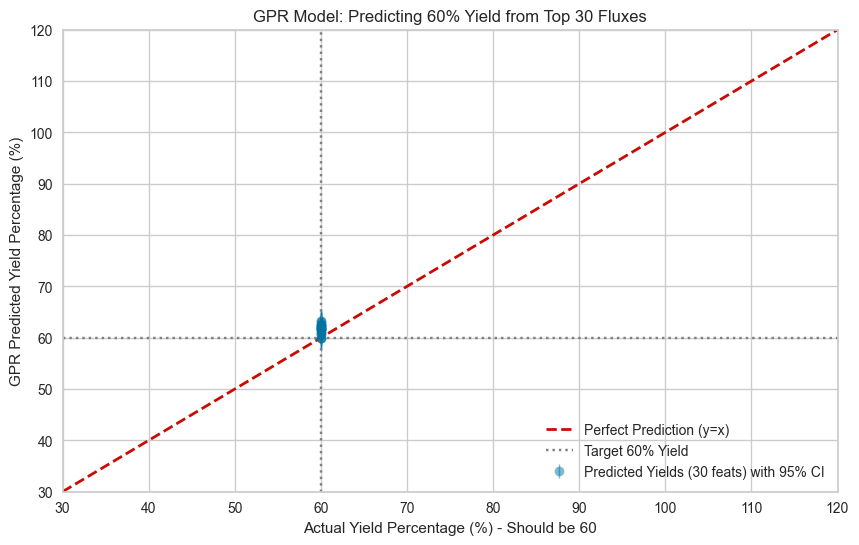

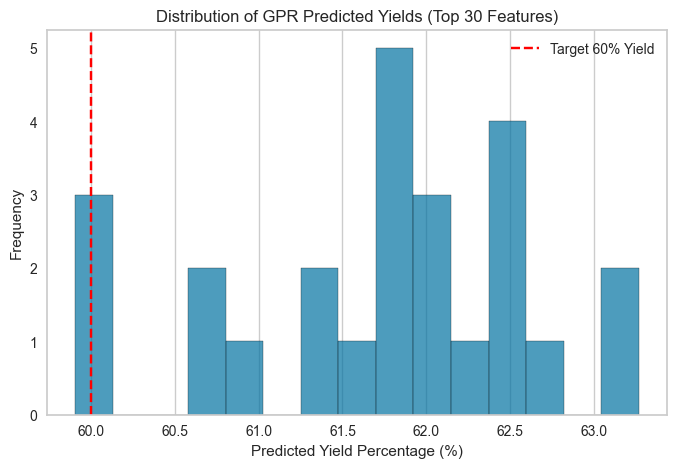

In [ ]:
import pandas as pd

import numpy as np

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

# --- 0. Placeholder DataFrames ---

# !! CRITICAL: REPLACE THESE WITH YOUR ACTUAL ALIGNED DATAFRAMES !!

# Ensure they have the 'Percentage' column and all relevant flux columns.

example_flux_columns = [f'RXN_{i}' for i in range(100)] # Example of more initial fluxes
def create_placeholder_df_fs(percentage_value, all_rxn_names, n_samples=100): # Samples for FS
    data = {'Percentage': [percentage_value] * n_samples}
    for i, rxn_name in enumerate(all_rxn_names):

        # Simulate some fluxes; make a few more correlated with yield for FS to pick up

        if i < 10: # First 10 are somewhat correlated
            data[rxn_name] = np.random.normal(loc=-(percentage_value/2 + 5 + i*0.1), scale=1.5, size=n_samples)
        elif i < 30: # Next 20 less so
            data[rxn_name] = np.random.normal(loc=np.random.uniform(-5, 5), scale=2, size=n_samples)
        else: # Rest are more random
            data[rxn_name] = np.random.normal(loc=np.random.uniform(-10, 10), scale=5, size=n_samples)
    return pd.DataFrame(data)
# !! REPLACE THESE WITH YOUR ACTUAL DATAFRAMES !!

# Use slightly larger samples for feature selection step if possible

actual_flux_columns = example_flux_columns # In your case, derive from your DFs
df_50_fs = create_placeholder_df_fs(50, actual_flux_columns, n_samples=100)
df_70_fs = create_placeholder_df_fs(70, actual_flux_columns, n_samples=100)
df_80_fs = create_placeholder_df_fs(80, actual_flux_columns, n_samples=100)
df_100_fs = create_placeholder_df_fs(100, actual_flux_columns, n_samples=100)
# Keep df_60_aligned separate for testing (can be smaller)

df_60_test_fs = create_placeholder_df_fs(60, actual_flux_columns, n_samples=50)
# --- 1. Prepare Combined Training Data for Feature Selection ---

fs_train_dfs = [df_50_fs, df_70_fs, df_80_fs, df_100_fs]
df_fs_train_all = pd.concat(fs_train_dfs, ignore_index=True)
X_fs_all = df_fs_train_all[actual_flux_columns] # Use all flux columns here
y_fs_all = df_fs_train_all['Percentage']
# --- 2. Feature Selection ---

k_best_features = 30  # Number of top features to select (try 30, 40, or 50)
print(f"\nSelecting top {k_best_features} features using SelectKBest with f_regression...")
# Scale data before feature selection (f_regression can be sensitive to scale)

scaler_fs = StandardScaler()
X_fs_all_scaled = scaler_fs.fit_transform(X_fs_all)
selector = SelectKBest(score_func=f_regression, k=k_best_features)
selector.fit(X_fs_all_scaled, y_fs_all)
# Get the names of the selected features

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_fs_all.columns[selected_feature_indices].tolist()
print(f"Top {k_best_features} features selected: {selected_feature_names}")
# --- 3. Prepare GPR Training & Test Data (using SELECTED features & FEW samples) ---

# Now create smaller training/test sets for GPR using only these selected features

n_samples_gpr_train_per_yield = 50 # e.g., 50 samples from each yield for GPR training
n_samples_gpr_test = 25            # e.g., 25 samples for GPR testing from 60%
gpr_train_dfs_selected_feats = []
if 'df_50_fs' in globals(): gpr_train_dfs_selected_feats.append(df_50_fs.sample(n_samples_gpr_train_per_yield, random_state=42))
if 'df_70_fs' in globals(): gpr_train_dfs_selected_feats.append(df_70_fs.sample(n_samples_gpr_train_per_yield, random_state=42))
if 'df_80_fs' in globals(): gpr_train_dfs_selected_feats.append(df_80_fs.sample(n_samples_gpr_train_per_yield, random_state=42))
if 'df_100_fs' in globals(): gpr_train_dfs_selected_feats.append(df_100_fs.sample(n_samples_gpr_train_per_yield, random_state=42))
df_gpr_train_selected_feats = pd.concat(gpr_train_dfs_selected_feats, ignore_index=True)
X_train_gpr_sf = df_gpr_train_selected_feats[selected_feature_names].values
y_train_gpr_sf = df_gpr_train_selected_feats['Percentage'].values
# Test data using the same selected features

df_gpr_test_selected_feats = df_60_test_fs.sample(n_samples_gpr_test, random_state=42)
X_test_gpr_sf = df_gpr_test_selected_feats[selected_feature_names].values
y_test_gpr_sf_true = df_gpr_test_selected_feats['Percentage'].values
print(f"\nTraining GPR to predict Yield with {X_train_gpr_sf.shape[1]} selected features using {len(X_train_gpr_sf)} samples.")
print(f"Testing GPR's yield prediction against {len(X_test_gpr_sf)} true 60% yield samples.")
# --- 4. Scale SELECTED Features for GPR---

scaler_gpr_sf = StandardScaler()
X_train_gpr_sf_scaled = scaler_gpr_sf.fit_transform(X_train_gpr_sf)
X_test_gpr_sf_scaled = scaler_gpr_sf.transform(X_test_gpr_sf)
# --- 5. Train Gaussian Process Regressor Model ---

kernel_sf = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.5, noise_level_bounds=(1e-5, 1e1))
gpr_sf = GaussianProcessRegressor(kernel=kernel_sf, n_restarts_optimizer=5, random_state=42, normalize_y=True)
print("\nTraining GPR model to predict yield with selected features...")
gpr_sf.fit(X_train_gpr_sf_scaled, y_train_gpr_sf)
print("GPR model training complete.")
# --- 6. Make Predictions on the 60% Test Data (Selected Features) ---

y_pred_gpr_sf_mean, y_pred_gpr_sf_std = gpr_sf.predict(X_test_gpr_sf_scaled, return_std=True)
print(f"\n--- GPR Predictions for 60% Yield (trained on top {k_best_features} fluxes from other yields) ---")
# --- 7. Evaluate ---

mae_gpr_sf = mean_absolute_error(y_test_gpr_sf_true, y_pred_gpr_sf_mean)
mse_gpr_sf = mean_squared_error(y_test_gpr_sf_true, y_pred_gpr_sf_mean)
r2_gpr_sf = r2_score(y_test_gpr_sf_true, y_pred_gpr_sf_mean)
print(f"MAE of GPR's yield predictions (top {k_best_features} features) on 60% data: {mae_gpr_sf:.4f}")
print(f"MSE of GPR's yield predictions (top {k_best_features} features) on 60% data: {mse_gpr_sf:.4f}")
print(f"R2 Score of GPR's yield predictions (top {k_best_features} features) on 60% data: {r2_gpr_sf:.4f}")
# --- 8. Plotting ---

plt.figure(figsize=(10, 6))
plt.errorbar(y_test_gpr_sf_true, y_pred_gpr_sf_mean, yerr=1.96 * y_pred_gpr_sf_std, fmt='o', alpha=0.5, elinewidth=1, capsize=3, label=f'Predicted Yields ({k_best_features} feats) with 95% CI')
min_val_plot = min(y_test_gpr_sf_true.min()-5, y_pred_gpr_sf_mean.min()-5, 30) # Adjusted min_val_plot
max_val_plot = max(y_test_gpr_sf_true.max()+5, y_pred_gpr_sf_mean.max()+5, 120) # Adjusted max_val_plot
plt.plot([min_val_plot, max_val_plot], [min_val_plot, max_val_plot], 'r--', lw=2, label='Perfect Prediction (y=x)')
plt.xlabel("Actual Yield Percentage (%) - Should be 60")
plt.ylabel("GPR Predicted Yield Percentage (%)")
plt.title(f"GPR Model: Predicting 60% Yield from Top {k_best_features} Fluxes")
plt.legend()
plt.grid(True)
plt.axhline(60, color='gray', linestyle=':', label='Target 60% Yield')
plt.axvline(60, color='gray', linestyle=':')
# Adjust xlim and ylim based on expected prediction range

plt.xlim(max(30, min_val_plot - 10) , min(120, max_val_plot + 10))
plt.ylim(max(30, min_val_plot - 10) , min(120, max_val_plot + 10))
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
plt.hist(y_pred_gpr_sf_mean, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(60, color='red', linestyle='--', label='Target 60% Yield')
plt.title(f"Distribution of GPR Predicted Yields (Top {k_best_features} Features)")
plt.xlabel("Predicted Yield Percentage (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
# In NOTEBOOK 1 (Data Prep - e.g., AI_for_chemistry_MLPregression.ipynb)

# Cell 1: Initial Imports (should be at the top of your notebook)

import pandas as pd

import numpy as np

import sys

import joblib # For scaler if you were to scale here, but we'll do it in Notebook 2

import json

from sklearn.model_selection import train_test_split # For splitting df_60

# Add the path to your modules directory (Update this path if needed)

module_path = '/Users/chadiassaf/Desktop/AI for Chemistry/Chadi&Denis/sample_analyses-chadi/'
if module_path not in sys.path:

    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
# Import your custom utility functions

try:

    from utils import merge_forward_reverse_fluxes

    print("Successfully imported 'merge_forward_reverse_fluxes' from user's modules.")
except ImportError:

    print("ERROR: Could not import 'merge_forward_reverse_fluxes'. Using MOCK function.")
    # --- (MOCK merge_forward_reverse_fluxes if not available - from previous responses) ---

    def merge_forward_reverse_fluxes(df_to_merge):

        print("MOCK merge_forward_reverse_fluxes called.")
        df_copy = df_to_merge.copy()
        cols_to_drop = []
        reactions_present = set()
        processed_bases = set()
        for col in df_copy.columns:

            if '_reverse_' in col:

                base_reaction = col.split('_reverse_')[0]
                if base_reaction in processed_bases: continue
                reactions_present.add(base_reaction)
                processed_bases.add(base_reaction)
                forward_col = base_reaction
                reverse_col = col
                if forward_col in df_copy.columns:

                    df_copy[base_reaction] = df_copy[forward_col] - df_copy[reverse_col]
                    cols_to_drop.append(reverse_col)
                else:

                    df_copy[base_reaction] = -df_copy[reverse_col]
                    cols_to_drop.append(reverse_col)
            elif not any(rev_suffix in col for rev_suffix in ['_reverse_']):

                if col not in processed_bases:

                    reactions_present.add(col)
                    processed_bases.add(col)
        df_merged = df_copy.drop(columns=cols_to_drop, errors='ignore')
        return df_merged
    # --- End Mock ---

# Cell 2: Define file paths

base_path = '/Users/chadiassaf/Desktop/AI for Chemistry/Chadi&Denis/sample_analyses-chadi/data/relaxed/'
file_path_50 = base_path + 'sampling_results_post_MINs_max_absent_for_yield_50.0.parquet'
file_path_60 = base_path + 'sampling_results_post_MINs_max_absent_for_yield_60.0.parquet'
file_path_70 = base_path + 'sampling_results_post_MINs_max_absent_for_yield_70.0.parquet'
file_path_80 = base_path + 'sampling_results_post_MINs_max_absent_for_yield_80.0.parquet' # Assuming you have this
file_path_100 = base_path + 'sampling_results_post_MINs_max_absent_for_yield_100.0.parquet' # Assuming you have this
# Cell 3: Data Loading, CORE Preprocessing, and ALIGNMENT

def load_and_basic_preprocess(file_path, yield_percentage, df_name="dataframe"):

    print(f"\n--- Loading and basic preprocessing for {df_name} (yield {yield_percentage}%) ---")
    raw_samples_df = pd.read_parquet(file_path)
    df_merged = merge_forward_reverse_fluxes(raw_samples_df.copy())
    df_no_thermo = df_merged.loc[:, ~df_merged.columns.str.startswith(('DG_', 'DGo_', 'LC_'))]
    df_processed = df_no_thermo.copy()
    # Drop 'index' column if it's the first column and named 'index'

    if df_processed.shape[1] > 0 and df_processed.columns[0] == 'index':

        print(f"Dropping the first column: '{df_processed.columns[0]}'")
        df_processed = df_processed.iloc[:, 1:] # More robust way to drop first column
    elif 'index' in df_processed.columns: # Failsafe if 'index' is present but not first
        print(f"Dropping column named 'index'")
        df_processed = df_processed.drop(columns=['index'], errors='ignore')
    df_processed['Percentage'] = yield_percentage
    print(f"Shape after basic preprocessing for {df_name}: {df_processed.shape}")
    return df_processed
# Load all datasets

df_50_base = load_and_basic_preprocess(file_path_50, 50, "Dataset50")
df_70_base = load_and_basic_preprocess(file_path_70, 70, "Dataset70")
df_60_base = load_and_basic_preprocess(file_path_60, 60, "Dataset60") # For validation average
df_80_base = load_and_basic_preprocess(file_path_80, 80, "Dataset80")   # For training
df_100_base = load_and_basic_preprocess(file_path_100, 100, "Dataset100") # For training
# --- Determine the SUPERSET of all flux columns (excluding 'Percentage') ---

# This list should include all dataframes that will be used anywhere

all_dfs_for_columns = [df_50_base, df_60_base, df_70_base, df_80_base, df_100_base]
all_flux_columns_superset = set()
for df in all_dfs_for_columns:

    if not df.empty: # Ensure dataframe is not empty before accessing columns
        flux_cols_in_df = [col for col in df.columns if col != 'Percentage']
        all_flux_columns_superset.update(flux_cols_in_df)
MASTER_FLUX_COLUMN_LIST = sorted(list(all_flux_columns_superset))
print(f"\nMaster list of {len(MASTER_FLUX_COLUMN_LIST)} unique flux columns created (e.g., {MASTER_FLUX_COLUMN_LIST[:3]}...).")
# --- Reindex all base dataframes to this master list ---

df_50_processed = df_50_base.reindex(columns=MASTER_FLUX_COLUMN_LIST + ['Percentage'], fill_value=0.0)
df_70_processed = df_70_base.reindex(columns=MASTER_FLUX_COLUMN_LIST + ['Percentage'], fill_value=0.0)
df_60_processed = df_60_base.reindex(columns=MASTER_FLUX_COLUMN_LIST + ['Percentage'], fill_value=0.0) # For validation
df_80_processed = df_80_base.reindex(columns=MASTER_FLUX_COLUMN_LIST + ['Percentage'], fill_value=0.0) # For training
df_100_processed = df_100_base.reindex(columns=MASTER_FLUX_COLUMN_LIST + ['Percentage'], fill_value=0.0) # For training
print(f"\nShape of df_50_processed after alignment: {df_50_processed.shape}")
print(f"Shape of df_70_processed after alignment: {df_70_processed.shape}")
print(f"Shape of df_60_processed after alignment: {df_60_processed.shape}") # For validation average
print(f"Shape of df_80_processed after alignment: {df_80_processed.shape}") # For training
print(f"Shape of df_100_processed after alignment: {df_100_processed.shape}")# For training
# Cell 4: Prepare X_train_mlp and y_train_mlp

TARGET_FLUX_TO_PREDICT = 'EX_glc__D_e'
# Datasets for training the MLP

# We'll use 50, 70, 80, 100 for training, and a small part of 60 for priming.

training_dfs_info = {
    50: df_50_processed,
    70: df_70_processed,
    80: df_80_processed,
    100: df_100_processed
}
# Split df_60_processed: small part for training (priming), rest for validation average later

df_60_prime_for_train, df_60_for_avg_validation_only = train_test_split(
    df_60_processed, test_size=0.90, random_state=42 # Using 10% of 60% for priming
)
training_dfs_info[60] = df_60_prime_for_train # Add the priming part
X_list = []
y_list = []
# 'all_base_flux_cols' are the "other flux" columns, EXCLUDING TARGET_FLUX_TO_PREDICT and 'Percentage'

# We derive it by taking MASTER_FLUX_COLUMN_LIST and removing TARGET_FLUX_TO_PREDICT

all_base_flux_cols = [col for col in MASTER_FLUX_COLUMN_LIST if col != TARGET_FLUX_TO_PREDICT]
for yield_val, df_proc in training_dfs_info.items():

    if df_proc.empty:

        print(f"Skipping {yield_val}% for training as its dataframe is empty.")
        continue
    y_mlp_train_part = df_proc[TARGET_FLUX_TO_PREDICT]
    X_mlp_train_part_other_fluxes = df_proc[all_base_flux_cols] # Select only the "other flux" columns
    X_temp = X_mlp_train_part_other_fluxes.copy()
    X_temp['Target_Yield_Input'] = yield_val # Add the yield as a feature
    X_list.append(X_temp)
    y_list.append(y_mlp_train_part)
X_train_mlp = pd.concat(X_list, ignore_index=True)
y_train_mlp = pd.concat(y_list, ignore_index=True)
print(f"\nShape of X_train_mlp BEFORE final reindex to ensure all features: {X_train_mlp.shape}")
print(f"Shape of y_train_mlp: {y_train_mlp.shape}")
# 'final_mlp_input_cols' are the columns X_train_mlp should have

# It's 'all_base_flux_cols' (other fluxes) PLUS 'Target_Yield_Input'

final_mlp_input_cols = all_base_flux_cols + ['Target_Yield_Input']
# Ensure unique and sorted for consistent column order if there were any accidental duplicates (should not happen here)

final_mlp_input_cols = sorted(list(set(final_mlp_input_cols)))
# Reindex X_train_mlp to ensure it has all columns in the correct order, filling missing with 0

# This step is crucial if any df_proc used in the loop was missing some columns from all_base_flux_cols

# (though they should have been aligned already by MASTER_FLUX_COLUMN_LIST application to df_XX_processed)

X_train_mlp = X_train_mlp.reindex(columns=final_mlp_input_cols, fill_value=0.0)
print(f"Shape of X_train_mlp AFTER final reindex: {X_train_mlp.shape}")
if 'Target_Yield_Input' in X_train_mlp.columns:

    print("'Target_Yield_Input' is present in X_train_mlp columns.")
    print("Sample values for 'Target_Yield_Input' in X_train_mlp:")
    print(X_train_mlp['Target_Yield_Input'].value_counts().sort_index())
else:

    print("CRITICAL ERROR: 'Target_Yield_Input' IS MISSING from X_train_mlp columns.")
print("\n--- Notebook 1 Data Preparation Complete ---")

Successfully imported 'merge_forward_reverse_fluxes' from user's modules.

--- Loading and basic preprocessing for Dataset50 (yield 50%) ---
Dropping the first column: 'index'
Shape after basic preprocessing for Dataset50: (10000, 653)

--- Loading and basic preprocessing for Dataset70 (yield 70%) ---
Dropping the first column: 'index'
Shape after basic preprocessing for Dataset70: (10000, 655)

--- Loading and basic preprocessing for Dataset60 (yield 60%) ---
Dropping the first column: 'index'
Shape after basic preprocessing for Dataset60: (10000, 659)

--- Loading and basic preprocessing for Dataset80 (yield 80%) ---
Dropping the first column: 'index'
Shape after basic preprocessing for Dataset80: (10000, 611)

--- Loading and basic preprocessing for Dataset100 (yield 100%) ---
Dropping the first column: 'index'
Shape after basic preprocessing for Dataset100: (10000, 619)

Master list of 693 unique flux columns created (e.g., ['3HAD100', '3HAD120', '3HAD121']...).

Shape of df_50_pro

Training GPR with 80 points from yields: [ 50  70  80 100]
Calculating MAE for 60% yield prediction against 20 true 60% yield samples.
  Actual range of EX_glc__D_e for these 60% samples: -14.2105 to -14.2105
  Mean actual EX_glc__D_e for these 60% samples: -14.2105
Learned GPR kernel: 1.67**2 * RBF(length_scale=28.5) + WhiteKernel(noise_level=0.000217)

--- GPR Prediction for 60% Yield (trained on 80 total points) ---
Predicted EX_glc__D_e for 60% yield: -14.3426
Standard deviation of prediction at 60% yield: 0.1232
95% Confidence Interval for EX_glc__D_e at 60% yield: (-14.5840, -14.1012)
MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: 0.1321

--- Predictions and Std Dev at Training Yield Points ---
Yield: 50.0%, Predicted EX_glc__D_e: -16.9575, Std Dev: 0.0468 (CI width: ~0.1835)
  Avg actual EX_glc__D_e in training for 50.0%: -16.9576
Yield: 70.0%, Predicted EX_glc__D_e: -12.1515, Std Dev: 0.0468 (CI width: ~0.1835)
  Avg actual EX_glc__D_e in training for

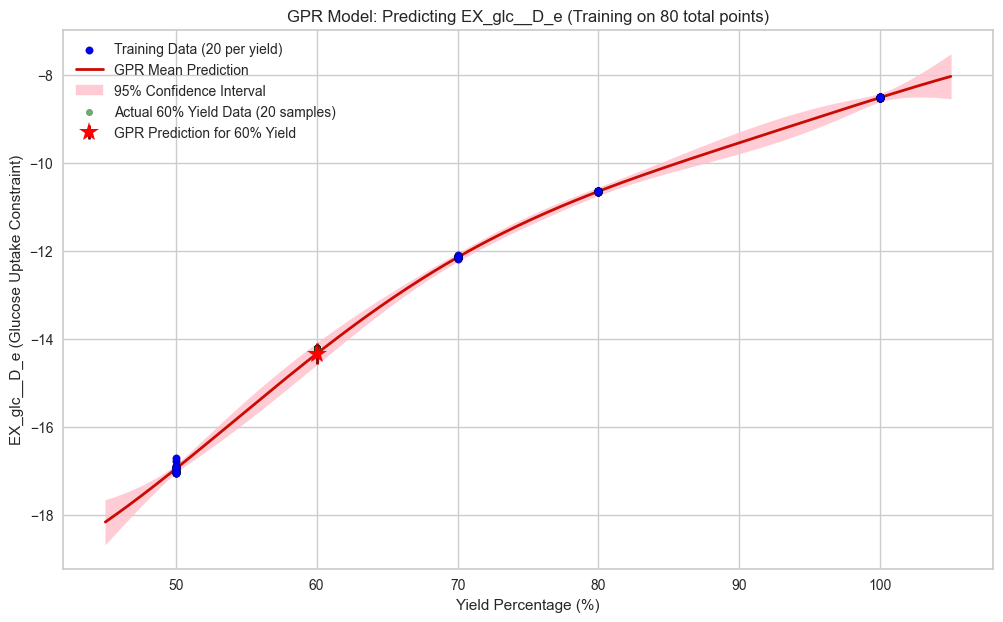


Statistics for GPR prediction standard deviations across the plotted range (y_plot_std):
  Min std (plot range): 0.0468
  Max std (plot range): 0.2572
  Mean std (plot range): 0.0919
  Std of stds (plot range): 0.0434
  Observation: The standard deviations of predictions show variability across the plotted range.


In [36]:
import pandas as pd

import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# --- Configuration ---

n_samples_per_yield_train = 20 # << TRY 20 first, then 100
n_samples_test_60 = 20        # Number of samples from df_60 for MAE calculation
# --- 1. Load and Prepare Training Data (NO 60% DATA HERE) ---

# Using the ORIGINAL dataframes df_50, df_70, df_80, df_100

required_dfs_train_original = ['df_50', 'df_70', 'df_80', 'df_100']
gpr_train_dfs_list = []
for df_name in required_dfs_train_original:

    if df_name not in globals():

        raise NameError(f"Original training DataFrame '{df_name}' is not defined.")
    current_df = globals()[df_name]
    if 'Percentage' not in current_df.columns or 'EX_glc__D_e' not in current_df.columns:

        raise KeyError(f"DataFrame '{df_name}' is missing 'Percentage' or 'EX_glc__D_e' column.")
    # Sample from each dataframe

    sample_size = min(n_samples_per_yield_train, len(current_df))
    if sample_size < n_samples_per_yield_train:

        print(f"Warning: Requested {n_samples_per_yield_train} samples from {df_name}, but only {len(current_df)} are available. Using {sample_size}.")
    if sample_size > 0:

         gpr_train_dfs_list.append(current_df[['Percentage', 'EX_glc__D_e']].sample(sample_size, random_state=42))
if not gpr_train_dfs_list:

    raise ValueError("No training data could be assembled. Check input dataframes and sample sizes.")
df_gpr_train = pd.concat(gpr_train_dfs_list, ignore_index=True).copy()
X_train_gpr = df_gpr_train[['Percentage']].values
y_train_gpr = df_gpr_train['EX_glc__D_e'].values
# --- 2. Prepare Test Data (ACTUAL 60% YIELD DATA) ---

if 'df_60' not in globals():

    raise NameError("Original test DataFrame 'df_60' is not defined.")
df_60_original = globals()['df_60']
if 'Percentage' not in df_60_original.columns or 'EX_glc__D_e' not in df_60_original.columns:

    raise KeyError("DataFrame 'df_60' is missing 'Percentage' or 'EX_glc__D_e' column.")
# Sample from df_60 for calculating MAE against the single 60% prediction

sample_size_60_test = min(n_samples_test_60, len(df_60_original))
if sample_size_60_test > 0:

    df_gpr_test_samples = df_60_original[['Percentage', 'EX_glc__D_e']].sample(sample_size_60_test, random_state=42).copy()
    y_test_gpr_true_values_for_mae = df_gpr_test_samples['EX_glc__D_e'].values
else:

    y_test_gpr_true_values_for_mae = np.array([])
X_test_gpr_target_value = np.array([[60.0]]) # Target yield for prediction
print(f"Training GPR with {len(X_train_gpr)} points from yields: {np.unique(X_train_gpr.flatten())}")
if len(y_test_gpr_true_values_for_mae) > 0:

    print(f"Calculating MAE for 60% yield prediction against {len(y_test_gpr_true_values_for_mae)} true 60% yield samples.")
    print(f"  Actual range of EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.min():.4f} to {y_test_gpr_true_values_for_mae.max():.4f}")
    print(f"  Mean actual EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.mean():.4f}")
# --- 3. Train Gaussian Process Regressor Model ---

# Kernel: ConstantKernel for signal variance, RBF for smoothness, WhiteKernel for noise.

# Setting noise_level in WhiteKernel to a small value if we trust the training points.

# alpha parameter can also be added directly to GPR for global noise.

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=5.0, length_scale_bounds=(1e-1, 1e2)) \
         + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8, 1e1)) 
         # Try small noise_level if training data is considered "exact"

gpr = GaussianProcessRegressor(kernel=kernel, 
                             n_restarts_optimizer=15, # Increased restarts for better hyperparameter tuning
                             random_state=42, 
                             normalize_y=True, # Normalizing Y can help with stability
                             # alpha=1e-5 # Alternative/additional way to specify observation noise

                            )
gpr.fit(X_train_gpr, y_train_gpr)
print(f"Learned GPR kernel: {gpr.kernel_}")
# --- 4. Make Predictions for 60% Yield ---

y_pred_gpr_mean_60, y_pred_gpr_std_60 = gpr.predict(X_test_gpr_target_value, return_std=True)
predicted_glucose_for_60_yield = y_pred_gpr_mean_60[0]
std_dev_at_60_yield = y_pred_gpr_std_60[0]
print(f"\n--- GPR Prediction for 60% Yield (trained on {n_samples_per_yield_train*4} total points) ---")
print(f"Predicted EX_glc__D_e for 60% yield: {predicted_glucose_for_60_yield:.4f}")
print(f"Standard deviation of prediction at 60% yield: {std_dev_at_60_yield:.4f}")
confidence_interval_95_lower_60 = predicted_glucose_for_60_yield - 1.96 * std_dev_at_60_yield
confidence_interval_95_upper_60 = predicted_glucose_for_60_yield + 1.96 * std_dev_at_60_yield
print(f"95% Confidence Interval for EX_glc__D_e at 60% yield: ({confidence_interval_95_lower_60:.4f}, {confidence_interval_95_upper_60:.4f})")
# --- 5. Evaluate MAE against your actual 60% data samples ---

if len(y_test_gpr_true_values_for_mae) > 0:

    mae_gpr_vs_true_60 = mean_absolute_error(np.full_like(y_test_gpr_true_values_for_mae, predicted_glucose_for_60_yield), y_test_gpr_true_values_for_mae)
    print(f"MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: {mae_gpr_vs_true_60:.4f}")
# --- Check CI at training points ---

train_yield_points = np.array([[50.0], [70.0], [80.0], [100.0]])
y_pred_train_mean, y_pred_train_std = gpr.predict(train_yield_points, return_std=True)
print("\n--- Predictions and Std Dev at Training Yield Points ---")
for i, yield_val in enumerate(train_yield_points.flatten()):

    print(f"Yield: {yield_val}%, Predicted EX_glc__D_e: {y_pred_train_mean[i]:.4f}, Std Dev: {y_pred_train_std[i]:.4f} (CI width: ~{1.96*2*y_pred_train_std[i]:.4f})")
    # Compare with average EX_glc__D_e from training data for that yield

    avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
    print(f"  Avg actual EX_glc__D_e in training for {yield_val}%: {avg_actual_y_at_train_x:.4f}")
# --- Plotting the GPR Fit and Prediction ---

plt.figure(figsize=(12, 7))
plt.scatter(X_train_gpr.flatten(), y_train_gpr, c='blue', s=30, zorder=10, edgecolors=(0,0,0,0.5), label=f'Training Data ({n_samples_per_yield_train} per yield)')
X_plot = np.linspace(45, 105, 300).reshape(-1, 1) # Plotting range
y_plot_mean, y_plot_std = gpr.predict(X_plot, return_std=True)
plt.plot(X_plot.flatten(), y_plot_mean, 'r-', lw=2, label='GPR Mean Prediction')
plt.fill_between(X_plot.flatten(), 
                 y_plot_mean - 1.96 * y_plot_std, 
                 y_plot_mean + 1.96 * y_plot_std,
                 alpha=0.8, color='pink', label='95% Confidence Interval')
# Highlight the prediction for 60% yield

plt.errorbar(X_test_gpr_target_value[0,0], predicted_glucose_for_60_yield, 
             yerr=1.96 * std_dev_at_60_yield, fmt='*', color='red', markersize=15, 
             ecolor='darkred', elinewidth=2, capsize=5, zorder=11, 
             label='GPR Prediction for 60% Yield')
# Plot actual 60% yield data points (if available and sampled)

if len(y_test_gpr_true_values_for_mae) > 0:

    plt.scatter(df_gpr_test_samples['Percentage'], y_test_gpr_true_values_for_mae, 
                c='green', s=20, alpha=0.6, edgecolors='k', 
                label=f'Actual 60% Yield Data ({n_samples_test_60} samples)')
plt.xlabel("Yield Percentage (%)")
plt.ylabel("EX_glc__D_e (Glucose Uptake Constraint)")
plt.title(f"GPR Model: Predicting EX_glc__D_e (Training on {n_samples_per_yield_train*4} total points)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("\nStatistics for GPR prediction standard deviations across the plotted range (y_plot_std):")
print(f"  Min std (plot range): {y_plot_std.min():.4f}")
print(f"  Max std (plot range): {y_plot_std.max():.4f}")
print(f"  Mean std (plot range): {y_plot_std.mean():.4f}")
print(f"  Std of stds (plot range): {y_plot_std.std():.4f}")
if y_plot_std.std() < 1e-3 and (y_plot_std.max() - y_plot_std.min()) < 1e-3 :

    print("  Observation: The standard deviations of predictions are very similar across the plotted range.")
else:

    print("  Observation: The standard deviations of predictions show variability across the plotted range.")

Training GPR with 60 points from yields: [ 50  80 100]
Calculating MAE for 60% yield prediction against 20 true 60% yield samples.
  Actual range of EX_glc__D_e for these 60% samples: -14.2105 to -14.2105
  Mean actual EX_glc__D_e for these 60% samples: -14.2105
Learned GPR kernel: 1.15**2 * RBF(length_scale=28.4) + WhiteKernel(noise_level=0.000206)

--- GPR Prediction for 60% Yield (trained on 80 total points) ---
Predicted EX_glc__D_e for 60% yield: -15.2442
Standard deviation of prediction at 60% yield: 0.5108
95% Confidence Interval for EX_glc__D_e at 60% yield: (-16.2454, -14.2430)
MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: 1.0337

--- Predictions and Std Dev at Training Yield Points ---
Yield: 50.0%, Predicted EX_glc__D_e: -16.9575, Std Dev: 0.0527 (CI width: ~0.2065)
  Avg actual EX_glc__D_e in training for 50.0%: -16.9576
Yield: 70.0%, Predicted EX_glc__D_e: -12.9066, Std Dev: 0.4228 (CI width: ~1.6574)
  Avg actual EX_glc__D_e in training for 70.

/var/folders/qp/rcn2b4cn49db3n9gqlrb62700000gn/T/ipykernel_65741/880737842.py:121: RuntimeWarning: Mean of empty slice.
  avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


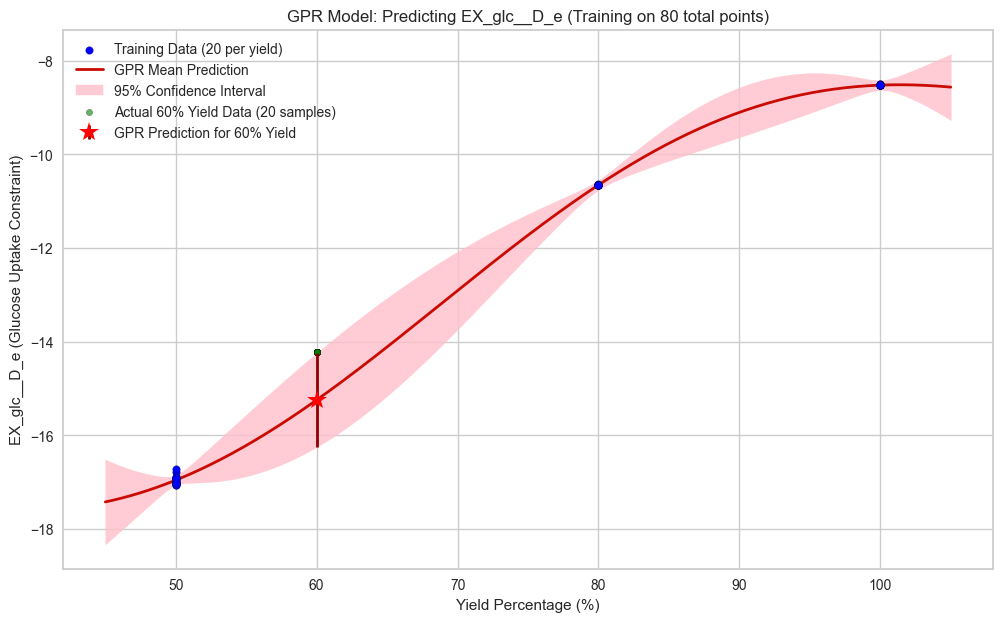


Statistics for GPR prediction standard deviations across the plotted range (y_plot_std):
  Min std (plot range): 0.0527
  Max std (plot range): 0.5417
  Mean std (plot range): 0.2718
  Std of stds (plot range): 0.1516
  Observation: The standard deviations of predictions show variability across the plotted range.


In [37]:
import pandas as pd

import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# --- Configuration ---

n_samples_per_yield_train = 20 # << TRY 20 first, then 100
n_samples_test_60 = 20        # Number of samples from df_60 for MAE calculation
# --- 1. Load and Prepare Training Data (NO 60% DATA HERE) ---

# Using the ORIGINAL dataframes df_50, df_70, df_80, df_100

required_dfs_train_original = ['df_50', 'df_80', 'df_100']
gpr_train_dfs_list = []
for df_name in required_dfs_train_original:

    if df_name not in globals():

        raise NameError(f"Original training DataFrame '{df_name}' is not defined.")
    current_df = globals()[df_name]
    if 'Percentage' not in current_df.columns or 'EX_glc__D_e' not in current_df.columns:

        raise KeyError(f"DataFrame '{df_name}' is missing 'Percentage' or 'EX_glc__D_e' column.")
    # Sample from each dataframe

    sample_size = min(n_samples_per_yield_train, len(current_df))
    if sample_size < n_samples_per_yield_train:

        print(f"Warning: Requested {n_samples_per_yield_train} samples from {df_name}, but only {len(current_df)} are available. Using {sample_size}.")
    if sample_size > 0:

         gpr_train_dfs_list.append(current_df[['Percentage', 'EX_glc__D_e']].sample(sample_size, random_state=42))
if not gpr_train_dfs_list:

    raise ValueError("No training data could be assembled. Check input dataframes and sample sizes.")
df_gpr_train = pd.concat(gpr_train_dfs_list, ignore_index=True).copy()
X_train_gpr = df_gpr_train[['Percentage']].values
y_train_gpr = df_gpr_train['EX_glc__D_e'].values
# --- 2. Prepare Test Data (ACTUAL 60% YIELD DATA) ---

if 'df_60' not in globals():

    raise NameError("Original test DataFrame 'df_60' is not defined.")
df_60_original = globals()['df_60']
if 'Percentage' not in df_60_original.columns or 'EX_glc__D_e' not in df_60_original.columns:

    raise KeyError("DataFrame 'df_60' is missing 'Percentage' or 'EX_glc__D_e' column.")
# Sample from df_60 for calculating MAE against the single 60% prediction

sample_size_60_test = min(n_samples_test_60, len(df_60_original))
if sample_size_60_test > 0:

    df_gpr_test_samples = df_60_original[['Percentage', 'EX_glc__D_e']].sample(sample_size_60_test, random_state=42).copy()
    y_test_gpr_true_values_for_mae = df_gpr_test_samples['EX_glc__D_e'].values
else:

    y_test_gpr_true_values_for_mae = np.array([])
X_test_gpr_target_value = np.array([[60.0]]) # Target yield for prediction
print(f"Training GPR with {len(X_train_gpr)} points from yields: {np.unique(X_train_gpr.flatten())}")
if len(y_test_gpr_true_values_for_mae) > 0:

    print(f"Calculating MAE for 60% yield prediction against {len(y_test_gpr_true_values_for_mae)} true 60% yield samples.")
    print(f"  Actual range of EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.min():.4f} to {y_test_gpr_true_values_for_mae.max():.4f}")
    print(f"  Mean actual EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.mean():.4f}")
# --- 3. Train Gaussian Process Regressor Model ---

# Kernel: ConstantKernel for signal variance, RBF for smoothness, WhiteKernel for noise.

# Setting noise_level in WhiteKernel to a small value if we trust the training points.

# alpha parameter can also be added directly to GPR for global noise.

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=5.0, length_scale_bounds=(1e-1, 1e2)) \
         + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8, 1e1)) 
         # Try small noise_level if training data is considered "exact"

gpr = GaussianProcessRegressor(kernel=kernel, 
                             n_restarts_optimizer=15, # Increased restarts for better hyperparameter tuning
                             random_state=42, 
                             normalize_y=True, # Normalizing Y can help with stability
                             # alpha=1e-5 # Alternative/additional way to specify observation noise

                            )
gpr.fit(X_train_gpr, y_train_gpr)
print(f"Learned GPR kernel: {gpr.kernel_}")
# --- 4. Make Predictions for 60% Yield ---

y_pred_gpr_mean_60, y_pred_gpr_std_60 = gpr.predict(X_test_gpr_target_value, return_std=True)
predicted_glucose_for_60_yield = y_pred_gpr_mean_60[0]
std_dev_at_60_yield = y_pred_gpr_std_60[0]
print(f"\n--- GPR Prediction for 60% Yield (trained on {n_samples_per_yield_train*4} total points) ---")
print(f"Predicted EX_glc__D_e for 60% yield: {predicted_glucose_for_60_yield:.4f}")
print(f"Standard deviation of prediction at 60% yield: {std_dev_at_60_yield:.4f}")
confidence_interval_95_lower_60 = predicted_glucose_for_60_yield - 1.96 * std_dev_at_60_yield
confidence_interval_95_upper_60 = predicted_glucose_for_60_yield + 1.96 * std_dev_at_60_yield
print(f"95% Confidence Interval for EX_glc__D_e at 60% yield: ({confidence_interval_95_lower_60:.4f}, {confidence_interval_95_upper_60:.4f})")
# --- 5. Evaluate MAE against your actual 60% data samples ---

if len(y_test_gpr_true_values_for_mae) > 0:

    mae_gpr_vs_true_60 = mean_absolute_error(np.full_like(y_test_gpr_true_values_for_mae, predicted_glucose_for_60_yield), y_test_gpr_true_values_for_mae)
    print(f"MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: {mae_gpr_vs_true_60:.4f}")
# --- Check CI at training points ---

train_yield_points = np.array([[50.0], [70.0], [80.0], [100.0]])
y_pred_train_mean, y_pred_train_std = gpr.predict(train_yield_points, return_std=True)
print("\n--- Predictions and Std Dev at Training Yield Points ---")
for i, yield_val in enumerate(train_yield_points.flatten()):

    print(f"Yield: {yield_val}%, Predicted EX_glc__D_e: {y_pred_train_mean[i]:.4f}, Std Dev: {y_pred_train_std[i]:.4f} (CI width: ~{1.96*2*y_pred_train_std[i]:.4f})")
    # Compare with average EX_glc__D_e from training data for that yield

    avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
    print(f"  Avg actual EX_glc__D_e in training for {yield_val}%: {avg_actual_y_at_train_x:.4f}")
# --- Plotting the GPR Fit and Prediction ---

plt.figure(figsize=(12, 7))
plt.scatter(X_train_gpr.flatten(), y_train_gpr, c='blue', s=30, zorder=10, edgecolors=(0,0,0,0.5), label=f'Training Data ({n_samples_per_yield_train} per yield)')
X_plot = np.linspace(45, 105, 300).reshape(-1, 1) # Plotting range
y_plot_mean, y_plot_std = gpr.predict(X_plot, return_std=True)
plt.plot(X_plot.flatten(), y_plot_mean, 'r-', lw=2, label='GPR Mean Prediction')
plt.fill_between(X_plot.flatten(), 
                 y_plot_mean - 1.96 * y_plot_std, 
                 y_plot_mean + 1.96 * y_plot_std,
                 alpha=0.8, color='pink', label='95% Confidence Interval')
# Highlight the prediction for 60% yield

plt.errorbar(X_test_gpr_target_value[0,0], predicted_glucose_for_60_yield, 
             yerr=1.96 * std_dev_at_60_yield, fmt='*', color='red', markersize=15, 
             ecolor='darkred', elinewidth=2, capsize=5, zorder=11, 
             label='GPR Prediction for 60% Yield')
# Plot actual 60% yield data points (if available and sampled)

if len(y_test_gpr_true_values_for_mae) > 0:

    plt.scatter(df_gpr_test_samples['Percentage'], y_test_gpr_true_values_for_mae, 
                c='green', s=20, alpha=0.6, edgecolors='k', 
                label=f'Actual 60% Yield Data ({n_samples_test_60} samples)')
plt.xlabel("Yield Percentage (%)")
plt.ylabel("EX_glc__D_e (Glucose Uptake Constraint)")
plt.title(f"GPR Model: Predicting EX_glc__D_e (Training on {n_samples_per_yield_train*4} total points)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("\nStatistics for GPR prediction standard deviations across the plotted range (y_plot_std):")
print(f"  Min std (plot range): {y_plot_std.min():.4f}")
print(f"  Max std (plot range): {y_plot_std.max():.4f}")
print(f"  Mean std (plot range): {y_plot_std.mean():.4f}")
print(f"  Std of stds (plot range): {y_plot_std.std():.4f}")
if y_plot_std.std() < 1e-3 and (y_plot_std.max() - y_plot_std.min()) < 1e-3 :

    print("  Observation: The standard deviations of predictions are very similar across the plotted range.")
else:

    print("  Observation: The standard deviations of predictions show variability across the plotted range.")

Training GPR with 40 points from yields: [ 50 100]
Calculating MAE for 60% yield prediction against 20 true 60% yield samples.
  Actual range of EX_glc__D_e for these 60% samples: -14.2105 to -14.2105
  Mean actual EX_glc__D_e for these 60% samples: -14.2105
Learned GPR kernel: 1**2 * RBF(length_scale=5) + WhiteKernel(noise_level=0.000222)

--- GPR Prediction for 60% Yield (trained on 80 total points) ---
Predicted EX_glc__D_e for 60% yield: -13.3094
Standard deviation of prediction at 60% yield: 4.1808
95% Confidence Interval for EX_glc__D_e at 60% yield: (-21.5038, -5.1150)
MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: 0.9011

--- Predictions and Std Dev at Training Yield Points ---
Yield: 50.0%, Predicted EX_glc__D_e: -16.9575, Std Dev: 0.0644 (CI width: ~0.2524)
  Avg actual EX_glc__D_e in training for 50.0%: -16.9576
Yield: 70.0%, Predicted EX_glc__D_e: -12.7398, Std Dev: 4.2196 (CI width: ~16.5410)
  Avg actual EX_glc__D_e in training for 70.0%: nan
Yi

/var/folders/qp/rcn2b4cn49db3n9gqlrb62700000gn/T/ipykernel_65741/559569567.py:121: RuntimeWarning: Mean of empty slice.
  avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


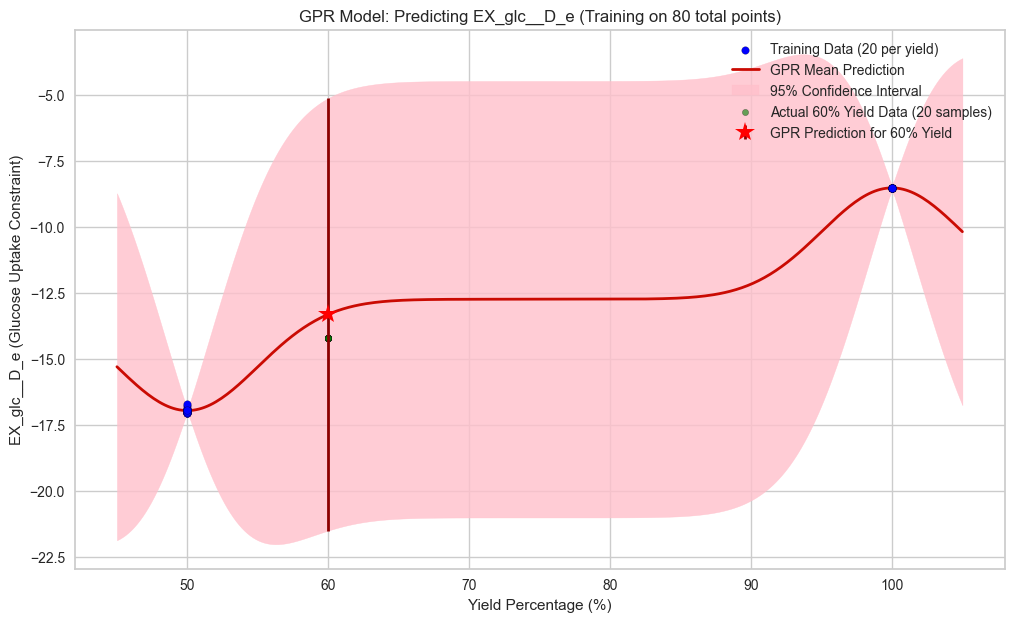


Statistics for GPR prediction standard deviations across the plotted range (y_plot_std):
  Min std (plot range): 0.0659
  Max std (plot range): 4.2196
  Mean std (plot range): 3.3882
  Std of stds (plot range): 1.2144
  Observation: The standard deviations of predictions show variability across the plotted range.


In [38]:
import pandas as pd

import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# --- Configuration ---

n_samples_per_yield_train = 20 # << TRY 20 first, then 100
n_samples_test_60 = 20        # Number of samples from df_60 for MAE calculation
# --- 1. Load and Prepare Training Data (NO 60% DATA HERE) ---

# Using the ORIGINAL dataframes df_50, df_70, df_80, df_100

required_dfs_train_original = ['df_50', 'df_100']
gpr_train_dfs_list = []
for df_name in required_dfs_train_original:

    if df_name not in globals():

        raise NameError(f"Original training DataFrame '{df_name}' is not defined.")
    current_df = globals()[df_name]
    if 'Percentage' not in current_df.columns or 'EX_glc__D_e' not in current_df.columns:

        raise KeyError(f"DataFrame '{df_name}' is missing 'Percentage' or 'EX_glc__D_e' column.")
    # Sample from each dataframe

    sample_size = min(n_samples_per_yield_train, len(current_df))
    if sample_size < n_samples_per_yield_train:

        print(f"Warning: Requested {n_samples_per_yield_train} samples from {df_name}, but only {len(current_df)} are available. Using {sample_size}.")
    if sample_size > 0:

         gpr_train_dfs_list.append(current_df[['Percentage', 'EX_glc__D_e']].sample(sample_size, random_state=42))
if not gpr_train_dfs_list:

    raise ValueError("No training data could be assembled. Check input dataframes and sample sizes.")
df_gpr_train = pd.concat(gpr_train_dfs_list, ignore_index=True).copy()
X_train_gpr = df_gpr_train[['Percentage']].values
y_train_gpr = df_gpr_train['EX_glc__D_e'].values
# --- 2. Prepare Test Data (ACTUAL 60% YIELD DATA) ---

if 'df_60' not in globals():

    raise NameError("Original test DataFrame 'df_60' is not defined.")
df_60_original = globals()['df_60']
if 'Percentage' not in df_60_original.columns or 'EX_glc__D_e' not in df_60_original.columns:

    raise KeyError("DataFrame 'df_60' is missing 'Percentage' or 'EX_glc__D_e' column.")
# Sample from df_60 for calculating MAE against the single 60% prediction

sample_size_60_test = min(n_samples_test_60, len(df_60_original))
if sample_size_60_test > 0:

    df_gpr_test_samples = df_60_original[['Percentage', 'EX_glc__D_e']].sample(sample_size_60_test, random_state=42).copy()
    y_test_gpr_true_values_for_mae = df_gpr_test_samples['EX_glc__D_e'].values
else:

    y_test_gpr_true_values_for_mae = np.array([])
X_test_gpr_target_value = np.array([[60.0]]) # Target yield for prediction
print(f"Training GPR with {len(X_train_gpr)} points from yields: {np.unique(X_train_gpr.flatten())}")
if len(y_test_gpr_true_values_for_mae) > 0:

    print(f"Calculating MAE for 60% yield prediction against {len(y_test_gpr_true_values_for_mae)} true 60% yield samples.")
    print(f"  Actual range of EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.min():.4f} to {y_test_gpr_true_values_for_mae.max():.4f}")
    print(f"  Mean actual EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.mean():.4f}")
# --- 3. Train Gaussian Process Regressor Model ---

# Kernel: ConstantKernel for signal variance, RBF for smoothness, WhiteKernel for noise.

# Setting noise_level in WhiteKernel to a small value if we trust the training points.

# alpha parameter can also be added directly to GPR for global noise.

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=5.0, length_scale_bounds=(1e-1, 1e2)) \
         + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8, 1e1)) 
         # Try small noise_level if training data is considered "exact"

gpr = GaussianProcessRegressor(kernel=kernel, 
                             n_restarts_optimizer=15, # Increased restarts for better hyperparameter tuning
                             random_state=42, 
                             normalize_y=True, # Normalizing Y can help with stability
                             # alpha=1e-5 # Alternative/additional way to specify observation noise

                            )
gpr.fit(X_train_gpr, y_train_gpr)
print(f"Learned GPR kernel: {gpr.kernel_}")
# --- 4. Make Predictions for 60% Yield ---

y_pred_gpr_mean_60, y_pred_gpr_std_60 = gpr.predict(X_test_gpr_target_value, return_std=True)
predicted_glucose_for_60_yield = y_pred_gpr_mean_60[0]
std_dev_at_60_yield = y_pred_gpr_std_60[0]
print(f"\n--- GPR Prediction for 60% Yield (trained on {n_samples_per_yield_train*4} total points) ---")
print(f"Predicted EX_glc__D_e for 60% yield: {predicted_glucose_for_60_yield:.4f}")
print(f"Standard deviation of prediction at 60% yield: {std_dev_at_60_yield:.4f}")
confidence_interval_95_lower_60 = predicted_glucose_for_60_yield - 1.96 * std_dev_at_60_yield
confidence_interval_95_upper_60 = predicted_glucose_for_60_yield + 1.96 * std_dev_at_60_yield
print(f"95% Confidence Interval for EX_glc__D_e at 60% yield: ({confidence_interval_95_lower_60:.4f}, {confidence_interval_95_upper_60:.4f})")
# --- 5. Evaluate MAE against your actual 60% data samples ---

if len(y_test_gpr_true_values_for_mae) > 0:

    mae_gpr_vs_true_60 = mean_absolute_error(np.full_like(y_test_gpr_true_values_for_mae, predicted_glucose_for_60_yield), y_test_gpr_true_values_for_mae)
    print(f"MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: {mae_gpr_vs_true_60:.4f}")
# --- Check CI at training points ---

train_yield_points = np.array([[50.0], [70.0], [80.0], [100.0]])
y_pred_train_mean, y_pred_train_std = gpr.predict(train_yield_points, return_std=True)
print("\n--- Predictions and Std Dev at Training Yield Points ---")
for i, yield_val in enumerate(train_yield_points.flatten()):

    print(f"Yield: {yield_val}%, Predicted EX_glc__D_e: {y_pred_train_mean[i]:.4f}, Std Dev: {y_pred_train_std[i]:.4f} (CI width: ~{1.96*2*y_pred_train_std[i]:.4f})")
    # Compare with average EX_glc__D_e from training data for that yield

    avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
    print(f"  Avg actual EX_glc__D_e in training for {yield_val}%: {avg_actual_y_at_train_x:.4f}")
# --- Plotting the GPR Fit and Prediction ---

plt.figure(figsize=(12, 7))
plt.scatter(X_train_gpr.flatten(), y_train_gpr, c='blue', s=30, zorder=10, edgecolors=(0,0,0,0.5), label=f'Training Data ({n_samples_per_yield_train} per yield)')
X_plot = np.linspace(45, 105, 300).reshape(-1, 1) # Plotting range
y_plot_mean, y_plot_std = gpr.predict(X_plot, return_std=True)
plt.plot(X_plot.flatten(), y_plot_mean, 'r-', lw=2, label='GPR Mean Prediction')
plt.fill_between(X_plot.flatten(), 
                 y_plot_mean - 1.96 * y_plot_std, 
                 y_plot_mean + 1.96 * y_plot_std,
                 alpha=0.8, color='pink', label='95% Confidence Interval')
# Highlight the prediction for 60% yield

plt.errorbar(X_test_gpr_target_value[0,0], predicted_glucose_for_60_yield, 
             yerr=1.96 * std_dev_at_60_yield, fmt='*', color='red', markersize=15, 
             ecolor='darkred', elinewidth=2, capsize=5, zorder=11, 
             label='GPR Prediction for 60% Yield')
# Plot actual 60% yield data points (if available and sampled)

if len(y_test_gpr_true_values_for_mae) > 0:

    plt.scatter(df_gpr_test_samples['Percentage'], y_test_gpr_true_values_for_mae, 
                c='green', s=20, alpha=0.6, edgecolors='k', 
                label=f'Actual 60% Yield Data ({n_samples_test_60} samples)')
plt.xlabel("Yield Percentage (%)")
plt.ylabel("EX_glc__D_e (Glucose Uptake Constraint)")
plt.title(f"GPR Model: Predicting EX_glc__D_e (Training on {n_samples_per_yield_train*4} total points)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("\nStatistics for GPR prediction standard deviations across the plotted range (y_plot_std):")
print(f"  Min std (plot range): {y_plot_std.min():.4f}")
print(f"  Max std (plot range): {y_plot_std.max():.4f}")
print(f"  Mean std (plot range): {y_plot_std.mean():.4f}")
print(f"  Std of stds (plot range): {y_plot_std.std():.4f}")
if y_plot_std.std() < 1e-3 and (y_plot_std.max() - y_plot_std.min()) < 1e-3 :

    print("  Observation: The standard deviations of predictions are very similar across the plotted range.")
else:

    print("  Observation: The standard deviations of predictions show variability across the plotted range.")

Training GPR with 60 points from yields: [ 70  80 100]
Calculating MAE for 60% yield prediction against 20 true 60% yield samples.
  Actual range of EX_glc__D_e for these 60% samples: -14.2105 to -14.2105
  Mean actual EX_glc__D_e for these 60% samples: -14.2105
Learned GPR kernel: 1.41**2 * RBF(length_scale=22.3) + WhiteKernel(noise_level=7.29e-05)

--- GPR Prediction for 60% Yield (trained on 80 total points) ---
Predicted EX_glc__D_e for 60% yield: -12.9813
Standard deviation of prediction at 60% yield: 0.4207
95% Confidence Interval for EX_glc__D_e at 60% yield: (-13.8058, -12.1568)
MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: 1.2292

--- Predictions and Std Dev at Training Yield Points ---
Yield: 70.0%, Predicted EX_glc__D_e: -12.1512, Std Dev: 0.0130 (CI width: ~0.0511)
  Avg actual EX_glc__D_e in training for 70.0%: -12.1512
Yield: 80.0%, Predicted EX_glc__D_e: -10.6519, Std Dev: 0.0130 (CI width: ~0.0511)
  Avg actual EX_glc__D_e in training for 80.

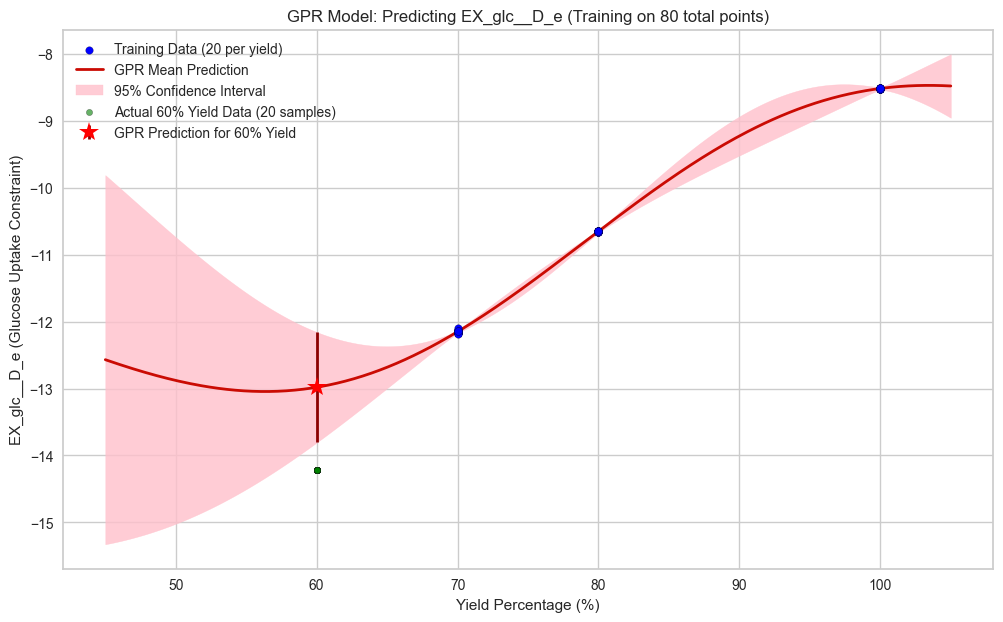


Statistics for GPR prediction standard deviations across the plotted range (y_plot_std):
  Min std (plot range): 0.0131
  Max std (plot range): 1.4061
  Mean std (plot range): 0.3086
  Std of stds (plot range): 0.3904
  Observation: The standard deviations of predictions show variability across the plotted range.


In [39]:
import pandas as pd

import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# --- Configuration ---

n_samples_per_yield_train = 20 # << TRY 20 first, then 100
n_samples_test_60 = 20        # Number of samples from df_60 for MAE calculation
# --- 1. Load and Prepare Training Data (NO 60% DATA HERE) ---

# Using the ORIGINAL dataframes df_50, df_70, df_80, df_100

required_dfs_train_original = ['df_70', 'df_80', 'df_100']
gpr_train_dfs_list = []
for df_name in required_dfs_train_original:

    if df_name not in globals():

        raise NameError(f"Original training DataFrame '{df_name}' is not defined.")
    current_df = globals()[df_name]
    if 'Percentage' not in current_df.columns or 'EX_glc__D_e' not in current_df.columns:

        raise KeyError(f"DataFrame '{df_name}' is missing 'Percentage' or 'EX_glc__D_e' column.")
    # Sample from each dataframe

    sample_size = min(n_samples_per_yield_train, len(current_df))
    if sample_size < n_samples_per_yield_train:

        print(f"Warning: Requested {n_samples_per_yield_train} samples from {df_name}, but only {len(current_df)} are available. Using {sample_size}.")
    if sample_size > 0:

         gpr_train_dfs_list.append(current_df[['Percentage', 'EX_glc__D_e']].sample(sample_size, random_state=42))
if not gpr_train_dfs_list:

    raise ValueError("No training data could be assembled. Check input dataframes and sample sizes.")
df_gpr_train = pd.concat(gpr_train_dfs_list, ignore_index=True).copy()
X_train_gpr = df_gpr_train[['Percentage']].values
y_train_gpr = df_gpr_train['EX_glc__D_e'].values
# --- 2. Prepare Test Data (ACTUAL 60% YIELD DATA) ---

if 'df_60' not in globals():

    raise NameError("Original test DataFrame 'df_60' is not defined.")
df_60_original = globals()['df_60']
if 'Percentage' not in df_60_original.columns or 'EX_glc__D_e' not in df_60_original.columns:

    raise KeyError("DataFrame 'df_60' is missing 'Percentage' or 'EX_glc__D_e' column.")
# Sample from df_60 for calculating MAE against the single 60% prediction

sample_size_60_test = min(n_samples_test_60, len(df_60_original))
if sample_size_60_test > 0:

    df_gpr_test_samples = df_60_original[['Percentage', 'EX_glc__D_e']].sample(sample_size_60_test, random_state=42).copy()
    y_test_gpr_true_values_for_mae = df_gpr_test_samples['EX_glc__D_e'].values
else:

    y_test_gpr_true_values_for_mae = np.array([])
X_test_gpr_target_value = np.array([[60.0]]) # Target yield for prediction
print(f"Training GPR with {len(X_train_gpr)} points from yields: {np.unique(X_train_gpr.flatten())}")
if len(y_test_gpr_true_values_for_mae) > 0:

    print(f"Calculating MAE for 60% yield prediction against {len(y_test_gpr_true_values_for_mae)} true 60% yield samples.")
    print(f"  Actual range of EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.min():.4f} to {y_test_gpr_true_values_for_mae.max():.4f}")
    print(f"  Mean actual EX_glc__D_e for these 60% samples: {y_test_gpr_true_values_for_mae.mean():.4f}")
# --- 3. Train Gaussian Process Regressor Model ---

# Kernel: ConstantKernel for signal variance, RBF for smoothness, WhiteKernel for noise.

# Setting noise_level in WhiteKernel to a small value if we trust the training points.

# alpha parameter can also be added directly to GPR for global noise.

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=5.0, length_scale_bounds=(1e-1, 1e2)) \
         + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8, 1e1)) 
         # Try small noise_level if training data is considered "exact"

gpr = GaussianProcessRegressor(kernel=kernel, 
                             n_restarts_optimizer=15, # Increased restarts for better hyperparameter tuning
                             random_state=42, 
                             normalize_y=True, # Normalizing Y can help with stability
                             # alpha=1e-5 # Alternative/additional way to specify observation noise

                            )
gpr.fit(X_train_gpr, y_train_gpr)
print(f"Learned GPR kernel: {gpr.kernel_}")
# --- 4. Make Predictions for 60% Yield ---

y_pred_gpr_mean_60, y_pred_gpr_std_60 = gpr.predict(X_test_gpr_target_value, return_std=True)
predicted_glucose_for_60_yield = y_pred_gpr_mean_60[0]
std_dev_at_60_yield = y_pred_gpr_std_60[0]
print(f"\n--- GPR Prediction for 60% Yield (trained on {n_samples_per_yield_train*4} total points) ---")
print(f"Predicted EX_glc__D_e for 60% yield: {predicted_glucose_for_60_yield:.4f}")
print(f"Standard deviation of prediction at 60% yield: {std_dev_at_60_yield:.4f}")
confidence_interval_95_lower_60 = predicted_glucose_for_60_yield - 1.96 * std_dev_at_60_yield
confidence_interval_95_upper_60 = predicted_glucose_for_60_yield + 1.96 * std_dev_at_60_yield
print(f"95% Confidence Interval for EX_glc__D_e at 60% yield: ({confidence_interval_95_lower_60:.4f}, {confidence_interval_95_upper_60:.4f})")
# --- 5. Evaluate MAE against your actual 60% data samples ---

if len(y_test_gpr_true_values_for_mae) > 0:

    mae_gpr_vs_true_60 = mean_absolute_error(np.full_like(y_test_gpr_true_values_for_mae, predicted_glucose_for_60_yield), y_test_gpr_true_values_for_mae)
    print(f"MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: {mae_gpr_vs_true_60:.4f}")
# --- Check CI at training points ---

train_yield_points = np.array([[70.0], [80.0], [100.0]])
y_pred_train_mean, y_pred_train_std = gpr.predict(train_yield_points, return_std=True)
print("\n--- Predictions and Std Dev at Training Yield Points ---")
for i, yield_val in enumerate(train_yield_points.flatten()):

    print(f"Yield: {yield_val}%, Predicted EX_glc__D_e: {y_pred_train_mean[i]:.4f}, Std Dev: {y_pred_train_std[i]:.4f} (CI width: ~{1.96*2*y_pred_train_std[i]:.4f})")
    # Compare with average EX_glc__D_e from training data for that yield

    avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
    print(f"  Avg actual EX_glc__D_e in training for {yield_val}%: {avg_actual_y_at_train_x:.4f}")
# --- Plotting the GPR Fit and Prediction ---

plt.figure(figsize=(12, 7))
plt.scatter(X_train_gpr.flatten(), y_train_gpr, c='blue', s=30, zorder=10, edgecolors=(0,0,0,0.5), label=f'Training Data ({n_samples_per_yield_train} per yield)')
X_plot = np.linspace(45, 105, 300).reshape(-1, 1) # Plotting range
y_plot_mean, y_plot_std = gpr.predict(X_plot, return_std=True)
plt.plot(X_plot.flatten(), y_plot_mean, 'r-', lw=2, label='GPR Mean Prediction')
plt.fill_between(X_plot.flatten(), 
                 y_plot_mean - 1.96 * y_plot_std, 
                 y_plot_mean + 1.96 * y_plot_std,
                 alpha=0.8, color='pink', label='95% Confidence Interval')
# Highlight the prediction for 60% yield

plt.errorbar(X_test_gpr_target_value[0,0], predicted_glucose_for_60_yield, 
             yerr=1.96 * std_dev_at_60_yield, fmt='*', color='red', markersize=15, 
             ecolor='darkred', elinewidth=2, capsize=5, zorder=11, 
             label='GPR Prediction for 60% Yield')
# Plot actual 60% yield data points (if available and sampled)

if len(y_test_gpr_true_values_for_mae) > 0:

    plt.scatter(df_gpr_test_samples['Percentage'], y_test_gpr_true_values_for_mae, 
                c='green', s=20, alpha=0.6, edgecolors='k', 
                label=f'Actual 60% Yield Data ({n_samples_test_60} samples)')
plt.xlabel("Yield Percentage (%)")
plt.ylabel("EX_glc__D_e (Glucose Uptake Constraint)")
plt.title(f"GPR Model: Predicting EX_glc__D_e (Training on {n_samples_per_yield_train*4} total points)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("\nStatistics for GPR prediction standard deviations across the plotted range (y_plot_std):")
print(f"  Min std (plot range): {y_plot_std.min():.4f}")
print(f"  Max std (plot range): {y_plot_std.max():.4f}")
print(f"  Mean std (plot range): {y_plot_std.mean():.4f}")
print(f"  Std of stds (plot range): {y_plot_std.std():.4f}")
if y_plot_std.std() < 1e-3 and (y_plot_std.max() - y_plot_std.min()) < 1e-3 :

    print("  Observation: The standard deviations of predictions are very similar across the plotted range.")
else:

    print("  Observation: The standard deviations of predictions show variability across the plotted range.")

Training GPR with 60 points from yields: [50 60 70]
Calculating MAE for 80% yield prediction against 20 true 80% yield samples.
  Actual range of EX_glc__D_e for these 80% samples: -14.2105 to -14.2105
  Mean actual EX_glc__D_e for these 80% samples: -14.2105
Learned GPR kernel: 1.45**2 * RBF(length_scale=16.7) + WhiteKernel(noise_level=0.000711)

--- GPR Prediction for 80% Yield (trained on 80 total points) ---
Predicted EX_glc__D_e for 80% yield: -12.0820
Standard deviation of prediction at 60% yield: 0.9198
95% Confidence Interval for EX_glc__D_e at 80% yield: (-13.8058, -10.2792)
MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: 2.1286

--- Predictions and Std Dev at Training Yield Points ---
Yield: 50.0%, Predicted EX_glc__D_e: -16.9574, Std Dev: 0.0538 (CI width: ~0.2110)
  Avg actual EX_glc__D_e in training for 50.0%: -16.9576
Yield: 60.0%, Predicted EX_glc__D_e: -14.2106, Std Dev: 0.0538 (CI width: ~0.2110)
  Avg actual EX_glc__D_e in training for 60.0%:

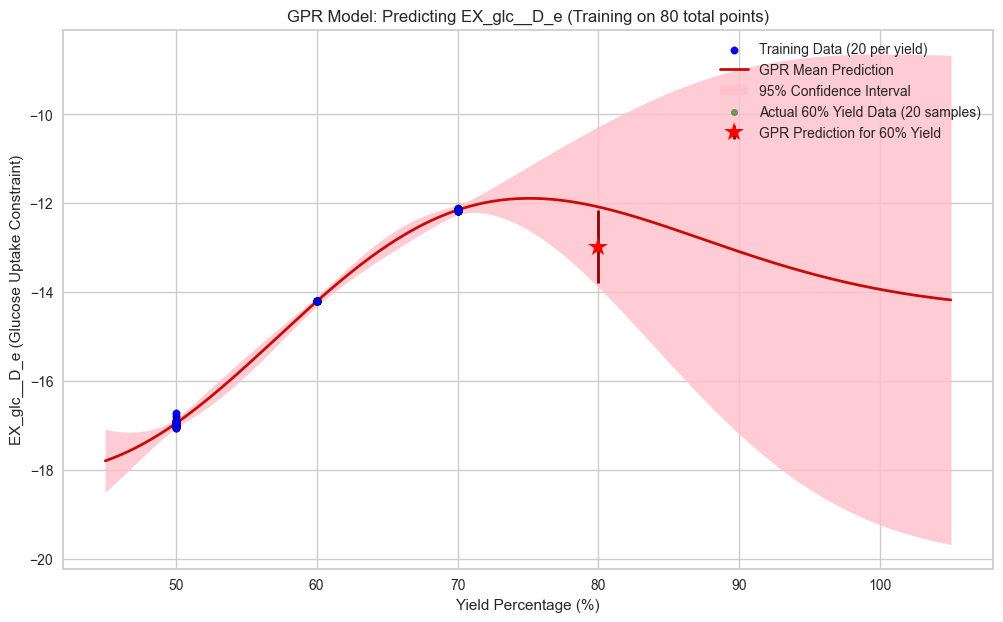


Statistics for GPR prediction standard deviations across the plotted range (y_plot_std):
  Min std (plot range): 0.0538
  Max std (plot range): 2.8066
  Mean std (plot range): 1.0048
  Std of stds (plot range): 1.0464
  Observation: The standard deviations of predictions show variability across the plotted range.


In [40]:
import pandas as pd

import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# --- Configuration ---

n_samples_per_yield_train = 20 # << TRY 20 first, then 100
n_samples_test_80 = 20        # Number of samples from df_60 for MAE calculation
# --- 1. Load and Prepare Training Data (NO 60% DATA HERE) ---

# Using the ORIGINAL dataframes df_50, df_70, df_80, df_100

required_dfs_train_original = ['df_50', 'df_60', 'df_70']
gpr_train_dfs_list = []
for df_name in required_dfs_train_original:

    if df_name not in globals():

        raise NameError(f"Original training DataFrame '{df_name}' is not defined.")
    current_df = globals()[df_name]
    if 'Percentage' not in current_df.columns or 'EX_glc__D_e' not in current_df.columns:

        raise KeyError(f"DataFrame '{df_name}' is missing 'Percentage' or 'EX_glc__D_e' column.")
    # Sample from each dataframe

    sample_size = min(n_samples_per_yield_train, len(current_df))
    if sample_size < n_samples_per_yield_train:

        print(f"Warning: Requested {n_samples_per_yield_train} samples from {df_name}, but only {len(current_df)} are available. Using {sample_size}.")
    if sample_size > 0:

         gpr_train_dfs_list.append(current_df[['Percentage', 'EX_glc__D_e']].sample(sample_size, random_state=42))
if not gpr_train_dfs_list:

    raise ValueError("No training data could be assembled. Check input dataframes and sample sizes.")
df_gpr_train = pd.concat(gpr_train_dfs_list, ignore_index=True).copy()
X_train_gpr = df_gpr_train[['Percentage']].values
y_train_gpr = df_gpr_train['EX_glc__D_e'].values
# --- 2. Prepare Test Data (ACTUAL 60% YIELD DATA) ---

if 'df_60' not in globals():

    raise NameError("Original test DataFrame 'df_80' is not defined.")
df_80_original = globals()['df_80']
if 'Percentage' not in df_80_original.columns or 'EX_glc__D_e' not in df_80_original.columns:

    raise KeyError("DataFrame 'df_80' is missing 'Percentage' or 'EX_glc__D_e' column.")
# Sample from df_60 for calculating MAE against the single 60% prediction

sample_size_80_test = min(n_samples_test_80, len(df_80_original))
if sample_size_80_test > 0:

    df_gpr_test_samples = df_60_original[['Percentage', 'EX_glc__D_e']].sample(sample_size_80_test, random_state=42).copy()
    y_test_gpr_true_values_for_mae = df_gpr_test_samples['EX_glc__D_e'].values
else:

    y_test_gpr_true_values_for_mae = np.array([])
X_test_gpr_target_value = np.array([[80.0]]) # Target yield for prediction
print(f"Training GPR with {len(X_train_gpr)} points from yields: {np.unique(X_train_gpr.flatten())}")
if len(y_test_gpr_true_values_for_mae) > 0:

    print(f"Calculating MAE for 80% yield prediction against {len(y_test_gpr_true_values_for_mae)} true 80% yield samples.")
    print(f"  Actual range of EX_glc__D_e for these 80% samples: {y_test_gpr_true_values_for_mae.min():.4f} to {y_test_gpr_true_values_for_mae.max():.4f}")
    print(f"  Mean actual EX_glc__D_e for these 80% samples: {y_test_gpr_true_values_for_mae.mean():.4f}")
# --- 3. Train Gaussian Process Regressor Model ---

# Kernel: ConstantKernel for signal variance, RBF for smoothness, WhiteKernel for noise.

# Setting noise_level in WhiteKernel to a small value if we trust the training points.

# alpha parameter can also be added directly to GPR for global noise.

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=5.0, length_scale_bounds=(1e-1, 1e2)) \
         + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-8, 1e1)) 
         # Try small noise_level if training data is considered "exact"

gpr = GaussianProcessRegressor(kernel=kernel, 
                             n_restarts_optimizer=15, # Increased restarts for better hyperparameter tuning
                             random_state=42, 
                             normalize_y=True, # Normalizing Y can help with stability
                             # alpha=1e-5 # Alternative/additional way to specify observation noise

                            )
gpr.fit(X_train_gpr, y_train_gpr)
print(f"Learned GPR kernel: {gpr.kernel_}")
# --- 4. Make Predictions for 80% Yield ---

y_pred_gpr_mean_80, y_pred_gpr_std_80 = gpr.predict(X_test_gpr_target_value, return_std=True)
predicted_glucose_for_80_yield = y_pred_gpr_mean_80[0]
std_dev_at_80_yield = y_pred_gpr_std_80[0]
print(f"\n--- GPR Prediction for 80% Yield (trained on {n_samples_per_yield_train*4} total points) ---")
print(f"Predicted EX_glc__D_e for 80% yield: {predicted_glucose_for_80_yield:.4f}")
print(f"Standard deviation of prediction at 60% yield: {std_dev_at_80_yield:.4f}")
confidence_interval_95_lower_80 = predicted_glucose_for_80_yield - 1.96 * std_dev_at_80_yield
confidence_interval_95_upper_80 = predicted_glucose_for_80_yield + 1.96 * std_dev_at_80_yield
print(f"95% Confidence Interval for EX_glc__D_e at 80% yield: ({confidence_interval_95_lower_60:.4f}, {confidence_interval_95_upper_80:.4f})")
# --- 5. Evaluate MAE against your actual 60% data samples ---

if len(y_test_gpr_true_values_for_mae) > 0:

    mae_gpr_vs_true_80 = mean_absolute_error(np.full_like(y_test_gpr_true_values_for_mae, predicted_glucose_for_80_yield), y_test_gpr_true_values_for_mae)
    print(f"MAE of GPR's single prediction for 60% vs actual 60% EX_glc__D_e samples: {mae_gpr_vs_true_80:.4f}")
# --- Check CI at training points ---

train_yield_points = np.array([[50.0], [60.0], [70.0]])
y_pred_train_mean, y_pred_train_std = gpr.predict(train_yield_points, return_std=True)
print("\n--- Predictions and Std Dev at Training Yield Points ---")
for i, yield_val in enumerate(train_yield_points.flatten()):

    print(f"Yield: {yield_val}%, Predicted EX_glc__D_e: {y_pred_train_mean[i]:.4f}, Std Dev: {y_pred_train_std[i]:.4f} (CI width: ~{1.96*2*y_pred_train_std[i]:.4f})")
    # Compare with average EX_glc__D_e from training data for that yield

    avg_actual_y_at_train_x = y_train_gpr[X_train_gpr.flatten() == yield_val].mean()
    print(f"  Avg actual EX_glc__D_e in training for {yield_val}%: {avg_actual_y_at_train_x:.4f}")
# --- Plotting the GPR Fit and Prediction ---

plt.figure(figsize=(12, 7))
plt.scatter(X_train_gpr.flatten(), y_train_gpr, c='blue', s=30, zorder=10, edgecolors=(0,0,0,0.5), label=f'Training Data ({n_samples_per_yield_train} per yield)')
X_plot = np.linspace(45, 105, 300).reshape(-1, 1) # Plotting range
y_plot_mean, y_plot_std = gpr.predict(X_plot, return_std=True)
plt.plot(X_plot.flatten(), y_plot_mean, 'r-', lw=2, label='GPR Mean Prediction')
plt.fill_between(X_plot.flatten(), 
                 y_plot_mean - 1.96 * y_plot_std, 
                 y_plot_mean + 1.96 * y_plot_std,
                 alpha=0.8, color='pink', label='95% Confidence Interval')
# Highlight the prediction for 60% yield

plt.errorbar(X_test_gpr_target_value[0,0], predicted_glucose_for_60_yield, 
             yerr=1.96 * std_dev_at_60_yield, fmt='*', color='red', markersize=15, 
             ecolor='darkred', elinewidth=2, capsize=5, zorder=11, 
             label='GPR Prediction for 60% Yield')
# Plot actual 60% yield data points (if available and sampled)

if len(y_test_gpr_true_values_for_mae) > 0:

    plt.scatter(df_gpr_test_samples['Percentage'], y_test_gpr_true_values_for_mae, 
                c='green', s=20, alpha=0.6, edgecolors='k', 
                label=f'Actual 60% Yield Data ({n_samples_test_80} samples)')
plt.xlabel("Yield Percentage (%)")
plt.ylabel("EX_glc__D_e (Glucose Uptake Constraint)")
plt.title(f"GPR Model: Predicting EX_glc__D_e (Training on {n_samples_per_yield_train*4} total points)")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("\nStatistics for GPR prediction standard deviations across the plotted range (y_plot_std):")
print(f"  Min std (plot range): {y_plot_std.min():.4f}")
print(f"  Max std (plot range): {y_plot_std.max():.4f}")
print(f"  Mean std (plot range): {y_plot_std.mean():.4f}")
print(f"  Std of stds (plot range): {y_plot_std.std():.4f}")
if y_plot_std.std() < 1e-3 and (y_plot_std.max() - y_plot_std.min()) < 1e-3 :

    print("  Observation: The standard deviations of predictions are very similar across the plotted range.")
else:

    print("  Observation: The standard deviations of predictions show variability across the plotted range.")

# Clustering

/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packa

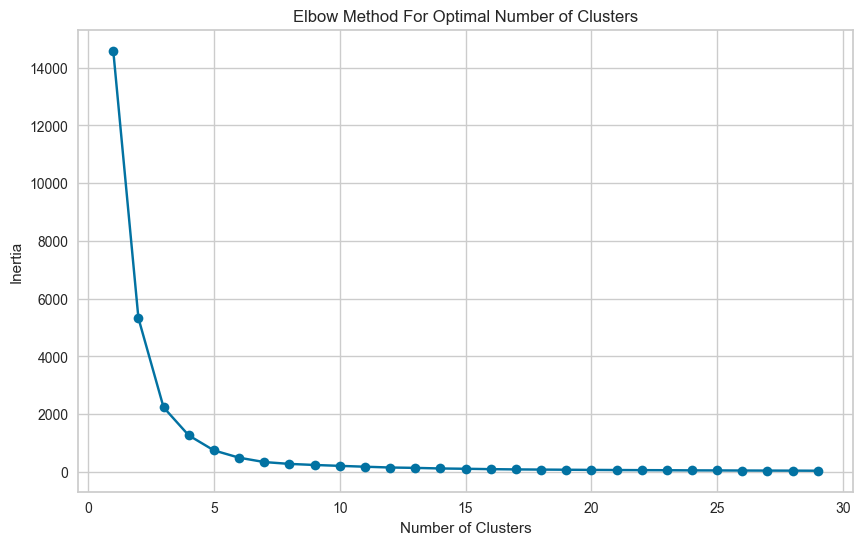

In [41]:
# Standardize the data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(subset_df)
# Apply PCA to reduce to 2 dimensions for visualization

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
# Verify the standardization by checking the mean and standard deviation of the first feature

mean = data_pca[:, 0].mean()
std_dev = data_pca[:, 0].std()
# Elbow method to determine the optimal number of clusters

inertia = []
cluster_range = range(1, 30)
for k in cluster_range:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)
# Plot the inertia values to find the elbow point

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)
cluster_labels = kmeans.fit_predict(data_pca)
kmeans.cluster_centers_

/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[-1.6841539 , -1.04360378],
       [ 5.0050745 ,  0.33399453],
       [-2.6061422 ,  4.34063489]])

/Users/chadiassaf/Desktop/AI for Chemistry/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


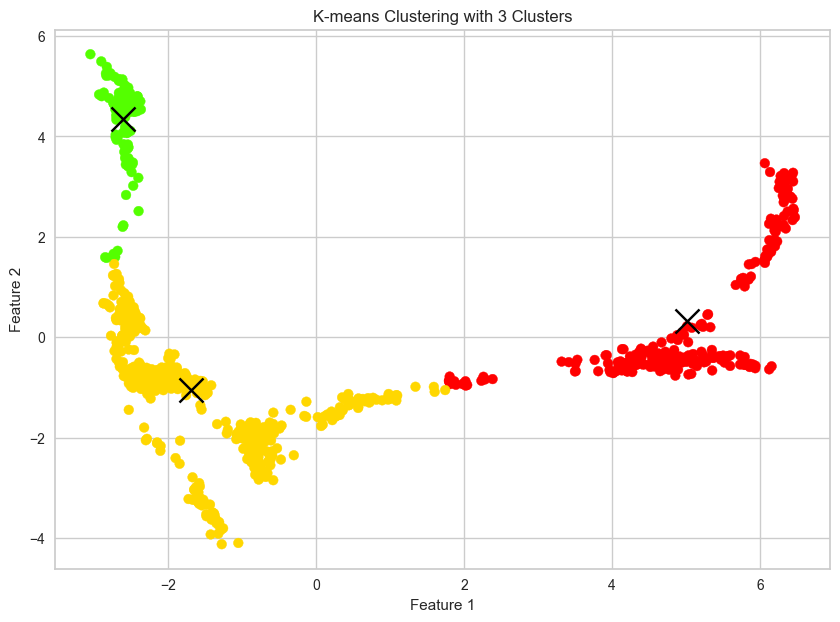

In [43]:
# Step 1: Initialize KMeans with the desired number of clusters

n_clusters = 3  # Adjust this number based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Step 2: Fit the model to the data and predict the cluster labels

cluster_labels = kmeans.fit_predict(data_pca)
# Step 3: Get the cluster centers

cluster_centers = kmeans.cluster_centers_
# Step 4: Visualize the clusters (using the first two features for simplicity)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='prism')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='black', marker='x')  # Plot cluster centers
plt.title(f'K-means Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()